# CRM Data Analyst Case

### The Company

Consider a well-established company operating in the retail food sector. Presently they have around several hundred thousands of registered customers and serve almost one million consumers a year. They sell products from 5 major categories: wines, rare meat products, exotic fruits, specially prepared fish and sweet products. These can further be divided into gold and regular products. The customers can order and acquire products through 3 sales channels: physical stores, catalogs and company’s website. Globally, the company had solid revenues and a healthy bottom line in the past 3 years, but the profit growth perspectives for the next 3 years are not promising... For this reason, several strategic initiatives are being considered to invert this situation. One is to improve the performance of marketing activities, with a special focus on marketing campaigns.

### The Description

The objective is to build a predictive model that will produce the highest profit for the next direct marketing campaign, scheduled for the next month. The new campaign, sixth, aims at selling a new gadget to the Customer Database. To build the model, a pilot campaign involving 2,240 customers was carried out. The customers were selected at random and contacted by phone regarding the acquisition of the gadget. During the following months, customers who bought the offer were properly labeled. The total cost of the sample campaign was 6.720MU and the revenue generated by the customers who accepted the offer was 3.674MU. Globally, the campaign had a profit of -3.046MU. The success rate of the campaign was 15%. The objective of the team is to develop a model that predicts customer behavior and to apply it to the rest of the customer base. Hopefully the model will allow the company to cherry pick the customers that are most likely to purchase the offer while leaving out the non-respondents, making the next campaign highly profitable.


### Key Objectives

1. Explore the data – be creative and pay attention to the details;
2. Propose and describe a customer segmentation based on customer behaviors;
3. Create a predictive model which allows that the company to maximize the profit of the next marketing campaign.

### Table of Contents:

- [CRM Data Analyst Case](#CRM-Data-Analyst-Case)
      - [The Company](#The-Company)
      - [The Description](#The-Description)
      - [Key Objectives](#Key-Objectives)
    - [Import necessary libraries and settings](#Import-necessary-libraries-and-settings)
- [1 Data Preprocessing and Exploratory Data Analysis (EDA):](#1-Data-Preprocessing-and-Exploratory-Data-Analysis-(EDA):)
    - [Data Exploration](#Data-Exploration)
    - [Data Preprocessing](#Data-Preprocessing)
      - [Data Cleaning](#Data-Cleaning)
      - [Data Transformation](#Data-Transformation)
      - [Quick Summary of the data](#Quick-Summary-of-the-data)
      - [Outliers Handling](#Outliers-Handling)
      - [Define a function to apply the Interquartile Range (IQR) method](#Define-a-function-to-apply-the-Interquartile-Range-(IQR)-method)
    - [Data Visualization](#Data-Visualization)
    - [Quick Summary On Findings Part One:](#Quick-Summary-On-Findings-Part-One:)
      - [Categorical Features:](#Categorical-Features:)
      - [Numerical Features:](#Numerical-Features:)
    - [Analyzing Demographic Patterns and Spending Behavior](#Analyzing-Demographic-Patterns-and-Spending-Behavior)
    - [Quick Summary On Findings Part Two:](#Quick-Summary-On-Findings-Part-Two:)
      - [Effectiveness of Marketing Campaigns](#Effectiveness-of-Marketing-Campaigns)
      - [Spending Analysis by Marital Status](#Spending-Analysis-by-Marital-Status)
      - [Spending Analysis by Education Level](#Spending-Analysis-by-Education-Level)
      - [Spending Analysis by Household Composition](#Spending-Analysis-by-Household-Composition)
    - [Examining Spending Patterns and Customer Behavior Based On Purchase Categories](#Examining-Spending-Patterns-and-Customer-Behavior-Based-On-Purchase-Categories)
      - [Examing On Some Of The Extreme Outliers](#Examing-On-Some-Of-The-Extreme-Outliers)
    - [Quick Summary On Findings Part Three:](#Quick-Summary-On-Findings-Part-Three:)
      - [Income and Spending Correlations](#Income-and-Spending-Correlations)
      - [Inter-Category Spending Relationships](#Inter-Category-Spending-Relationships)
      - [Recency Patterns](#Recency-Patterns)
      - [Distribution Insights (KDE)](#Distribution-Insights-(KDE))
      - [Implications for Marketing and Strategy](#Implications-for-Marketing-and-Strategy)
    - [Features Correlation Analysis](#Features-Correlation-Analysis)
      - [ToDo](#ToDo)
- [2 Customer Segmentation](#2-Customer-Segmentation)
    - [RFM (Recency-Frequency-Monetary) Modeling](#RFM-(Recency-Frequency-Monetary)-Modeling)
    - [K-Means algorithm](#K-Means-algorithm)
      - [Application in Customer Segmentation:](#Application-in-Customer-Segmentation:)
      - [Customer Segmentation Using K-Means Clustering](#Customer-Segmentation-Using-K-Means-Clustering)
    - [Elbow Method](#Elbow-Method)
    - [Cluster Analysis:](#Cluster-Analysis:)
      - [Center Examination](#Center-Examination)
      - [Density and Separation](#Density-and-Separation)
      - [Silhouette Score](#Silhouette-Score)
    - [Quick Summary Of Clustering:](#Quick-Summary-Of-Clustering:)
    - [Examing on The Characteristics of Each Cluster](#Examing-on-The-Characteristics-of-Each-Cluster)
      - [Summary:](#Summary:)
    - [Summary of Clusters](#Summary-of-Clusters)
      - [Cluster 0](#Cluster-0)
      - [Cluster 1](#Cluster-1)
      - [Cluster 2](#Cluster-2)
      - [Cluster 3](#Cluster-3)
- [3 Predictive Model Building](#3-Predictive-Model-Building)
    - [Addressing Class Imbalance and Cross-Validation](#Addressing-Class-Imbalance-and-Cross-Validation)
    - [Model Selection](#Model-Selection)
      - [Model Training and Evaluation Functions](#Model-Training-and-Evaluation-Functions)
    - [Choosing Features](#Choosing-Features)
    - [Data split](#Data-split)
    - [Applying Oversampling Using SMOTE](#Applying-Oversampling-Using-SMOTE)
    - [Model Training and Evaluation](#Model-Training-and-Evaluation)
- [Technical Summary of Predictive Model Performance](#Technical-Summary-of-Predictive-Model-Performance)
    - [Objective:](#Objective)
      - [Evaluation Metrics:](#Evaluation-Metrics:)
      - [Model Performance:](#Model-Performance:)
      - [Feature Importance Analysis:](#Feature-Importance-Analysis:)
      - [Recommendations:](#Recommendations:)
      - [Conclusion:](#Conclusion:)
- [Executive Summary for Stakeholders: Maximizing Profit for the Upcoming Marketing Campaign](#Executive-Summary-for-Stakeholders:-Maximizing-Profit-for-the-Upcoming-Marketing-Campaign)
    - [Introduction:](#Introduction:)
      - [Understanding Customer Behavior](#Understanding-Customer-Behavior)
      - [Insights from Past Marketing Campaigns](#Insights-from-Past-Marketing-Campaigns)
      - [Digital Engagement](#Digital-Engagement)
      - [Model Performance](#Model-Performance)
    - [Recommendations and Next Steps](#Recommendations-and-Next-Steps)
    - [Conclusion](#Conclusion)

## Import necessary libraries and settings

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interactive
from scipy import stats
from scipy.cluster import hierarchy

import yellowbrick
from yellowbrick.cluster.base import ClusteringScoreVisualizer
from yellowbrick.cluster import InterclusterDistance, SilhouetteVisualizer

import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import (
    train_test_split, StratifiedKFold,
    RandomizedSearchCV, GridSearchCV)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import silhouette_score, accuracy_score, classification_report, roc_auc_score

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from xgboost import XGBClassifier

In [2]:
# Set the maximum number of rows to display (e.g., 100)
pd.set_option("display.max_rows", 2500)

# Set the maximum number of columns to display (e.g., 100)
pd.set_option("display.max_columns", 100)

warnings.filterwarnings("ignore")  # Ignore all warnings

# 1 Data Preprocessing and Exploratory Data Analysis (EDA):

In [3]:
# Read the dataset into a DataFrame called df_raw
file_name = "Customer_Seg_Data.csv"

try:
    df_raw = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Error: File '{file_name}' not found.")
except pandas.errors.ParserError:
    print(f"Error: field to parse the CSV file: '{file_name}'.")
except pandas.errors.EmptyDataError:
    print(f"Error: File '{file_name}' is empty or contains no data.")

df_raw.shape

(2240, 29)

## Data Exploration

In [4]:
# Display the first few rows of the DataFrame
df_raw.head(100)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0    5524        1957  Graduation         Single  58138.0        0         0   
1    2174        1954  Graduation         Single  46344.0        1         1   
2    4141        1965  Graduation       Together  71613.0        0         0   
3    6182        1984  Graduation       Together  26646.0        1         0   
4    5324        1981         PhD        Married  58293.0        1         0   
5    7446        1967      Master       Together  62513.0        0         1   
6     965        1971  Graduation       Divorced  55635.0        0         1   
7    6177        1985         PhD        Married  33454.0        1         0   
8    4855        1974         PhD       Together  30351.0        1         0   
9    5899        1950         PhD       Together   5648.0        1         1   
10   1994        1983  Graduation        Married      NaN        1         0   
11    387        1976       Basic        Married   7500.0        0         0   
12   2125        1959  Graduation       Divorced  63033.0        0         0   
13   8180        1952      Master       Divorced  59354.0        1         1   
14   2569        1987  Graduation        Married  17323.0        0         0   
15   2114        1946         PhD         Single  82800.0        0         0   
16   9736        1980  Graduation        Married  41850.0        1         1   
17   4939        1946  Graduation       Together  37760.0        0         0   
18   6565        1949      Master        Married  76995.0        0         1   
19   2278        1985    2n Cycle         Single  33812.0        1         0   
20   9360        1982  Graduation        Married  37040.0        0         0   
21   5376        1979  Graduation        Married   2447.0        1         0   
22   1993        1949         PhD        Married  58607.0        0         1   
23   4047        1954         PhD        Married  65324.0        0         1   
24   1409        1951  Graduation       Together  40689.0        0         1   
25   7892        1969  Graduation         Single  18589.0        0         0   
26   2404        1976  Graduation        Married  53359.0        1         1   
27   5255        1986  Graduation         Single      NaN        1         0   
28   9422        1989  Graduation        Married  38360.0        1         0   
29   1966        1965         PhD        Married  84618.0        0         0   
30   6864        1989      Master       Divorced  10979.0        0         0   
31   3033        1963      Master       Together  38620.0        0         0   
32   5710        1970  Graduation       Together  40548.0        0         1   
33   7373        1952         PhD       Divorced  46610.0        0         2   
34   8755        1946      Master        Married  68657.0        0         0   
35  10738        1951      Master         Single  49389.0        1         1   
36   4339        1970         PhD        Married  67353.0        0         1   
37  10755        1976    2n Cycle        Married  23718.0        1         0   
38   8595        1973  Graduation          Widow  42429.0        0         1   
39   2968        1943         PhD       Divorced  48948.0        0         0   
40   8601        1980  Graduation        Married  80011.0        0         1   
41    503        1985      Master        Married  20559.0        1         0   
42   8430        1957  Graduation       Together  21994.0        0         1   
43   7281        1959         PhD         Single      NaN        0         0   
44   2139        1975      Master        Married   7500.0        1         0   
45   1371        1976  Graduation         Single  79941.0        0         0   
46   9909        1996    2n Cycle        Married   7500.0        0         0   
47   7286        1968  Graduation       Together  41728.0        1         0   
48   7244        1951  Graduation         Single      NaN        2         1   
49   65

In [5]:
# Explore the basic information of the DataFrame, including data types and missing values
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Data Preprocessing

### Data Cleaning

In [6]:
# Checking for duplicated rows
df_raw.duplicated().sum()

0

In [7]:
df_data = df_raw

print(df_data["Z_CostContact"].value_counts())
print(df_data["Z_Revenue"].value_counts())

3    2240
Name: Z_CostContact, dtype: int64
11    2240
Name: Z_Revenue, dtype: int64


In [8]:
# The columns Z_CostContact and Z_Revenue have a constant value across all entries; we can drop these columns.
df_data.drop(["Z_CostContact", "Z_Revenue"], axis=1, inplace=True)

In [9]:
# It seems we have some missing values for column "Income".
# Since it is only about 1%, We used median imputation to replace the missing values.
df_data["Income"].fillna(df_data["Income"].median(), inplace=True)

df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Data Transformation

In [10]:
# Some Data Transformation
# Convert "Dt_Customer" to datetime 
df_data["Dt_Customer"] = pd.to_datetime(df_data["Dt_Customer"])

# Calculate "Days_Since_Joined" to represent the number of days since the customer joined
current_date = pd.to_datetime("today").normalize()  # Get the current date without time
df_data["Days_Since_Joined"] = (current_date - df_data["Dt_Customer"]).dt.days

# Calculate customer age using "Year_Birth" and the current year
year_data = current_date.year
df_data["Age"] = year_data - df_data["Year_Birth"]

# Calculate "AcceptedCmpTotal" to represent the total number of accepted campaigns
df_data["AcceptedCmpTotal"] = df_data.loc[:,["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].sum(axis=1)

# Creating a new feature indicates famlies with kids, and how many.
df_data["Childhome"] = df_data.loc[:, ["Kidhome", "Teenhome"]].sum(axis=1)

# Drop unnecessary columns "ID", "Year_Birth", and "Dt_Customer"
df_data.drop(["ID", "Year_Birth", "Dt_Customer"], axis=1, inplace=True)

# Review the first few rows of the DataFrame
df_data.head()

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation         Single  58138.0        0         0       58       635   
1  Graduation         Single  46344.0        1         1       38        11   
2  Graduation       Together  71613.0        0         0       26       426   
3  Graduation       Together  26646.0        1         0       26        11   
4         PhD        Married  58293.0        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0         0         1   
1             0             0             0         0         0   
2             0             0             0         0         0   
3             0             0             0         0         0   
4             0             0             0         0         0   

   Days_Since_Joined  Age  AcceptedCmpTotal  Childhome  
0               3999   66                 0          0  
1               3449   69                 0          2  
2               3648   58                 0          0  
3               3475   39                 0          1  
4               3497   42                 0          1

In [11]:
# More data exploration after Data Preprocessing
# Display summary statistics of the preprocessed DataFrame
df_data.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    52237.975446     0.444196     0.506250    49.109375   303.935714   
std     25037.955891     0.538398     0.544538    28.962453   336.597393   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35538.750000     0.000000     0.000000    24.000000    23.750000   
50%     51381.500000     0.000000     0.000000    49.000000   173.500000   
75%     68289.750000     1.000000     1.000000    74.000000   504.250000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2240.000000      2240.000000      2240.000000       2240.000000   
mean     26.302232       166.950000        37.525446         27.062946   
std      39.773434       225.715373        54.628979         41.280498   
min       0.000000         0.000000         0.000000          0.000000   
25%       1.000000        16.000000         3.000000          1.000000   
50%       8.000000        67.000000        12.000000          8.000000   
75%      33.000000       232.000000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        263.000000   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count   2240.000000        2240.000000      2240.000000          2240.000000   
mean      44.021875           2.325000         4.084821             2.662054   
std       52.167439           1.932238         2.778714             2.923101   
min        0.000000           0.000000         0.000000             0.000000   
25%        9.000000           1.000000         2.000000             0.000000   
50%       24.000000           2.000000         4.000000             2.000000   
75%       56.000000           3.000000         6.000000             4.000000   
max      362.000000          15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2240.000000        2240.000000   2240.000000   2240.000000   
mean            5.790179           5.316518      0.072768      0.074554   
std             3.250958           2.426645      0.259813      0.262728   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2240.000000   2240.000000   2240.000000  2240.000000  2240.000000   
mean       0.072768      0.064286      0.013393     0.009375     0.149107   
std        0.259813      0.245316      0.114976     0.096391     0.356274   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

       Days_Since_Joined          Age  AcceptedCmpTotal    Childhome  
count        2240.000000  2240.000000       2240.000000  2240.000000  
mean         3689.582143    54.194196          0.297768     0.950446  
std           202.122512    11.984069          0.678381     0.751803  
min          3336.000000    27.000000          0.000000     0.000000  
25%          3516.750000    46.000000          0.000000     0.000000  
50%          3691.500000    53.000000          0.000000     1.000000  
75%          3865.000000    64.000000          0.000000     1.000000  
max

### Quick Summary of the data
A few things to note so far:
1. "Age" column has a maximum value of 130 which suggests some inaccurate data's presence.
2. "Income" column, which has a maximum value of 666666. This value seems quite high compared to the mean income, suggesting the presence of outliers.
3. The "Response" column is our target variable. It appears to be imbalanced, with only about 15% of customers accepting the offer in the last campaign. This is an important factor to consider when training our predictive models later.

### Outliers Handling

<Axes: >

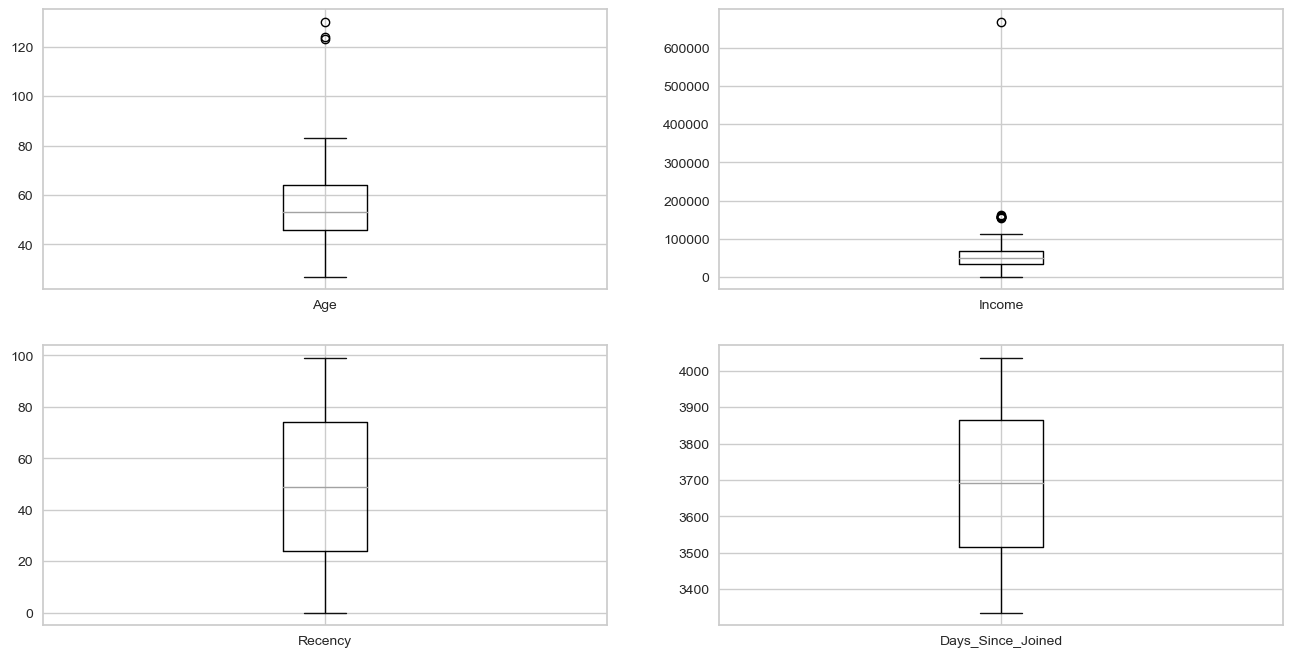

In [12]:
# Use Robust Scaler to handle outliers in some numerical features (Age, Income, Recency, Days_Since_Joined)
fig, axes = plt.subplots( 2, 2, figsize = (16, 8))

# Plot numerical features, 2 graphs per row.
#fig, axes = plt.subplots( round(len(num_features)/2), 2, figsize=(16, round(4*len(num_features)/2)))
#for i, feature in enumerate(num_features):
#    x = i // 2
#    y = i % 2
#    sns.boxplot(data=df_data, x=feature, hue=target, ax=axes[x, y])

df_data.boxplot(column="Age", ax=axes[0, 0])
df_data.boxplot(column="Income", ax=axes[0, 1])
df_data.boxplot(column="Recency", ax=axes[1, 0])
df_data.boxplot(column="Days_Since_Joined", ax=axes[1, 1])

### Define a function to apply the Interquartile Range (IQR) method

In [13]:
def remove_outliers_iqr(data_frame, column_name):
    #    Remove outliers from a DataFrame using the Interquartile Range (IQR) method.

    #    Args:
    #        data_frame (pd.DataFrame): The DataFrame containing the data.
    #        column_name (str): The name of the column in the DataFrame to analyze for outliers.

    #    Returns:
    #        pd.DataFrame: A new DataFrame with outliers removed from the specified column.
    #        pd.DataFrame: The DataFrame containing the outliers that were removed.
    
    # Calculate Q1 and Q3
    Q1 = data_frame[column_name].quantile(0.25)
    Q3 = data_frame[column_name].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Outliers
    outliers = data_frame[ (data_frame[column_name] < lower_bound ) | (data_frame[column_name] > upper_bound) ]
    
    # Remove outliers
    data_frame = data_frame[ (data_frame[column_name] >= lower_bound ) & (data_frame[column_name] <= upper_bound) ]
    
    return data_frame, outliers

In [14]:
# Print the shape of the original dataframe
print(df_data.shape)

# Remove outliers from 'Age' column and examine the outliers
df_data, agr_outliers = remove_outliers_iqr(df_data, "Age")

# Print the shape of the dataframe after removing outliers
print(df_data.shape)

# Display the list of outliers that were identified and removed from the 'Age' column
agr_outliers

(2240, 28)
(2237, 28)


Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
192  2n Cycle       Divorced  36640.0        1         0       99        15   
239  2n Cycle         Single  60182.0        0         1       23         8   
339       PhD       Together  83532.0        0         0       36       755   

     MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
192          6                8                7                 4   
239          0                5                7                 0   
339        144              562              104                64   

     MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
192            25                  1                2                    1   
239             2                  1                1                    0   
339           224                  1                4                    6   

     NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
192                  2                  5             0             0   
239                  2                  4             0             0   
339                  4                  1             0             0   

     AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
192             0             0             0         1         0   
239             0             0             0         0         0   
339             1             0             0         0         0   

     Days_Since_Joined  Age  AcceptedCmpTotal  Childhome  
192               3612  123                 0          1  
239               3379  130                 0          1  
339               3612  124                 1          0

In [15]:
# Remove outliers from 'Income' column and examine the outliers
df_data, income_outliers = remove_outliers_iqr(df_data, "Income")

# Print the shape of the dataframe after removing outliers
print(df_data.shape)

# Display the list of outliers that were identified and removed from the 'Income' column
income_outliers

(2229, 28)


Education Marital_Status    Income  Kidhome  Teenhome  Recency  \
164          PhD        Married  157243.0        0         1       98   
617          PhD       Together  162397.0        1         1       31   
655   Graduation       Divorced  153924.0        0         0       81   
687          PhD        Married  160803.0        0         0       21   
1300      Master       Together  157733.0        1         0       37   
1653  Graduation       Together  157146.0        0         0       13   
2132         PhD        Married  156924.0        0         0       85   
2233  Graduation       Together  666666.0        1         0       23   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
164         20          2             1582                1                 2   
617         85          1               16                2                 1   
655          1          1                1                1                 1   
687         55         16             1622               17                 3   
1300        39          1                9                2                 0   
1653         1          0             1725                2                 1   
2132         2          1                2                1                 1   
2233         9         14               18                8                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
164              1                 15                0                   22   
617              2                  0                0                    0   
655              1                  0                0                    0   
687              4                 15                0                   28   
1300             8                  0                1                    0   
1653             1                  0                0                   28   
2132             1                  0                0                    0   
2233            12                  4                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
164                   0                  0             0             0   
617                   1                  1             0             0   
655                   0                  0             0             0   
687                   1                  0             0             0   
1300                  1                  1             0             0   
1653                  0                  1             0             0   
2132                  0                  0             0             0   
2233                  3                  6             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
164              0             0             0         0         0   
617              0             0             0         0         0   
655              0             0             0         0         0   
687              0             0             0         0         0   
1300             0             0             0         0         0   
1653             0             0             0         0         0   
2132             0             0             0         0         0   
2233             0             0             0         0         0   

      Days_Since_Joined  Age  AcceptedCmpTotal  Childhome  
164                3456   50                 0          1  
617                3727   47                 0          2  
655                3478   48                 0          0  
687                4030   41                 0          0  
1300               3726   52                 0          1  
1653               3762   46                 0          0  
2132               3640   74                 0          0  
2233               3728   46                 0          1

## Data Visualization

Visualize the data to better understand the patterns, trends, and relationships between different variables. Since we already know that the response rate is only at 15%, we'll start by exploring the categorical features (Education and Marital_Status), and then move on to the numerical features. We'll look at their distributions, as well as how they relate to the target variable Response.

We'll also look at how income and spending on different product categories affect the response.

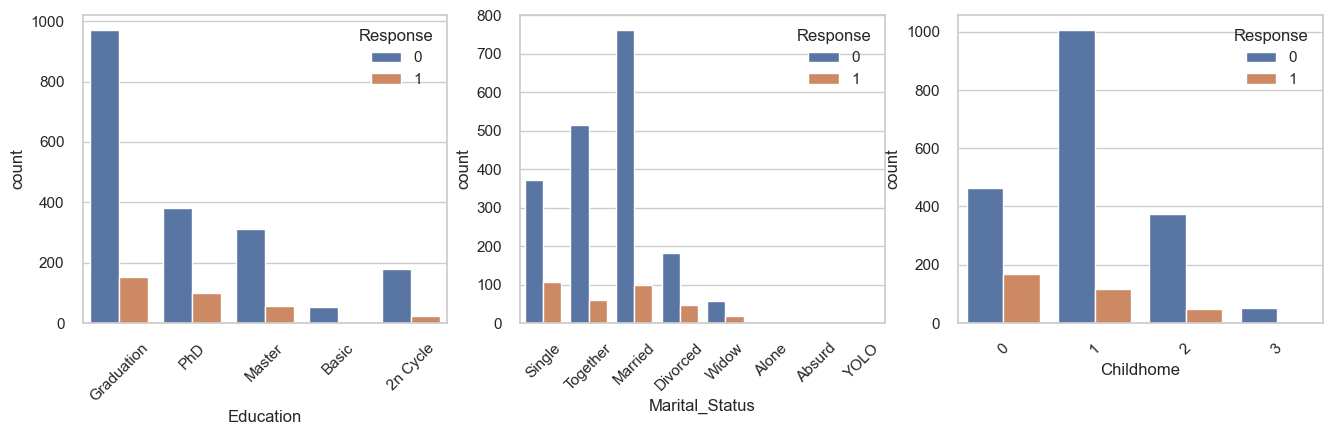

In [16]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Categorical features
cat_features = ['Education', 'Marital_Status', "Childhome"]

# Numerical features
num_features = ['Income', "Kidhome", "Teenhome", "Recency", "MntWines", 
                "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", 
                "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", 
                "NumStorePurchases", "NumWebVisitsMonth", "Days_Since_Joined", "Age", "AcceptedCmpTotal"]

# Response feature
target = "Response"

# Plot categorical features
fig, axes = plt.subplots(1, len(cat_features), figsize=(16, 4))
for i, feature in enumerate(cat_features):
    sns.countplot(data=df_data, x=feature, hue=target, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=45)

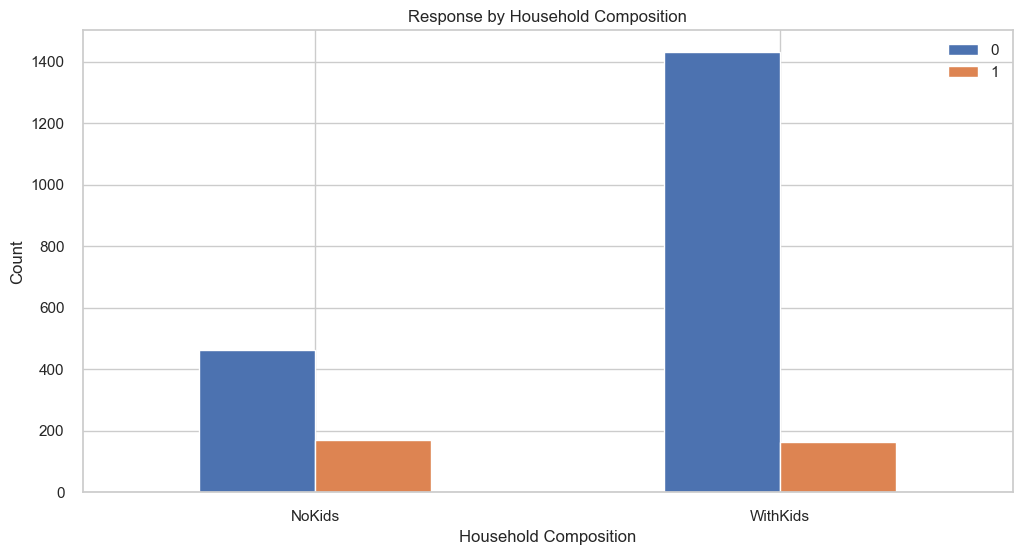

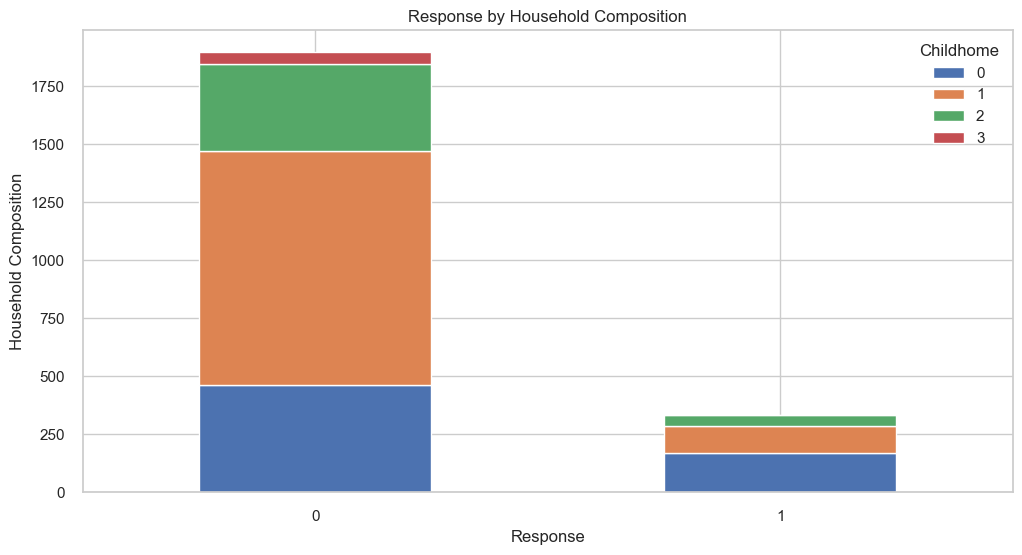

In [17]:
# Grouping the data by the presence of children and calculating the response count for each group
response_by_childhome = df_data.groupby(df_data["Childhome"].apply(lambda x: 'NoKids' if x == 0 else 'WithKids'))['Response'].value_counts().unstack().fillna(0).reset_index()

# Renaming the columns for clarity
response_by_childhome.columns = ['Household Composition', '0', '1']

# Plotting the stacked bar chart
response_by_childhome.plot(x="Household Composition", kind='bar', figsize=(12, 6))
plt.title('Response by Household Composition')
plt.xlabel('Household Composition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Also look at how household composition affect the response.
response_by_household_composition = df_data.groupby(df_data["Childhome"])[target].value_counts().unstack().fillna(0)
response_by_household_composition.transpose().plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title('Response by Household Composition')
plt.xlabel("Response")
plt.ylabel('Household Composition')
plt.xticks(rotation=0)
plt.show()

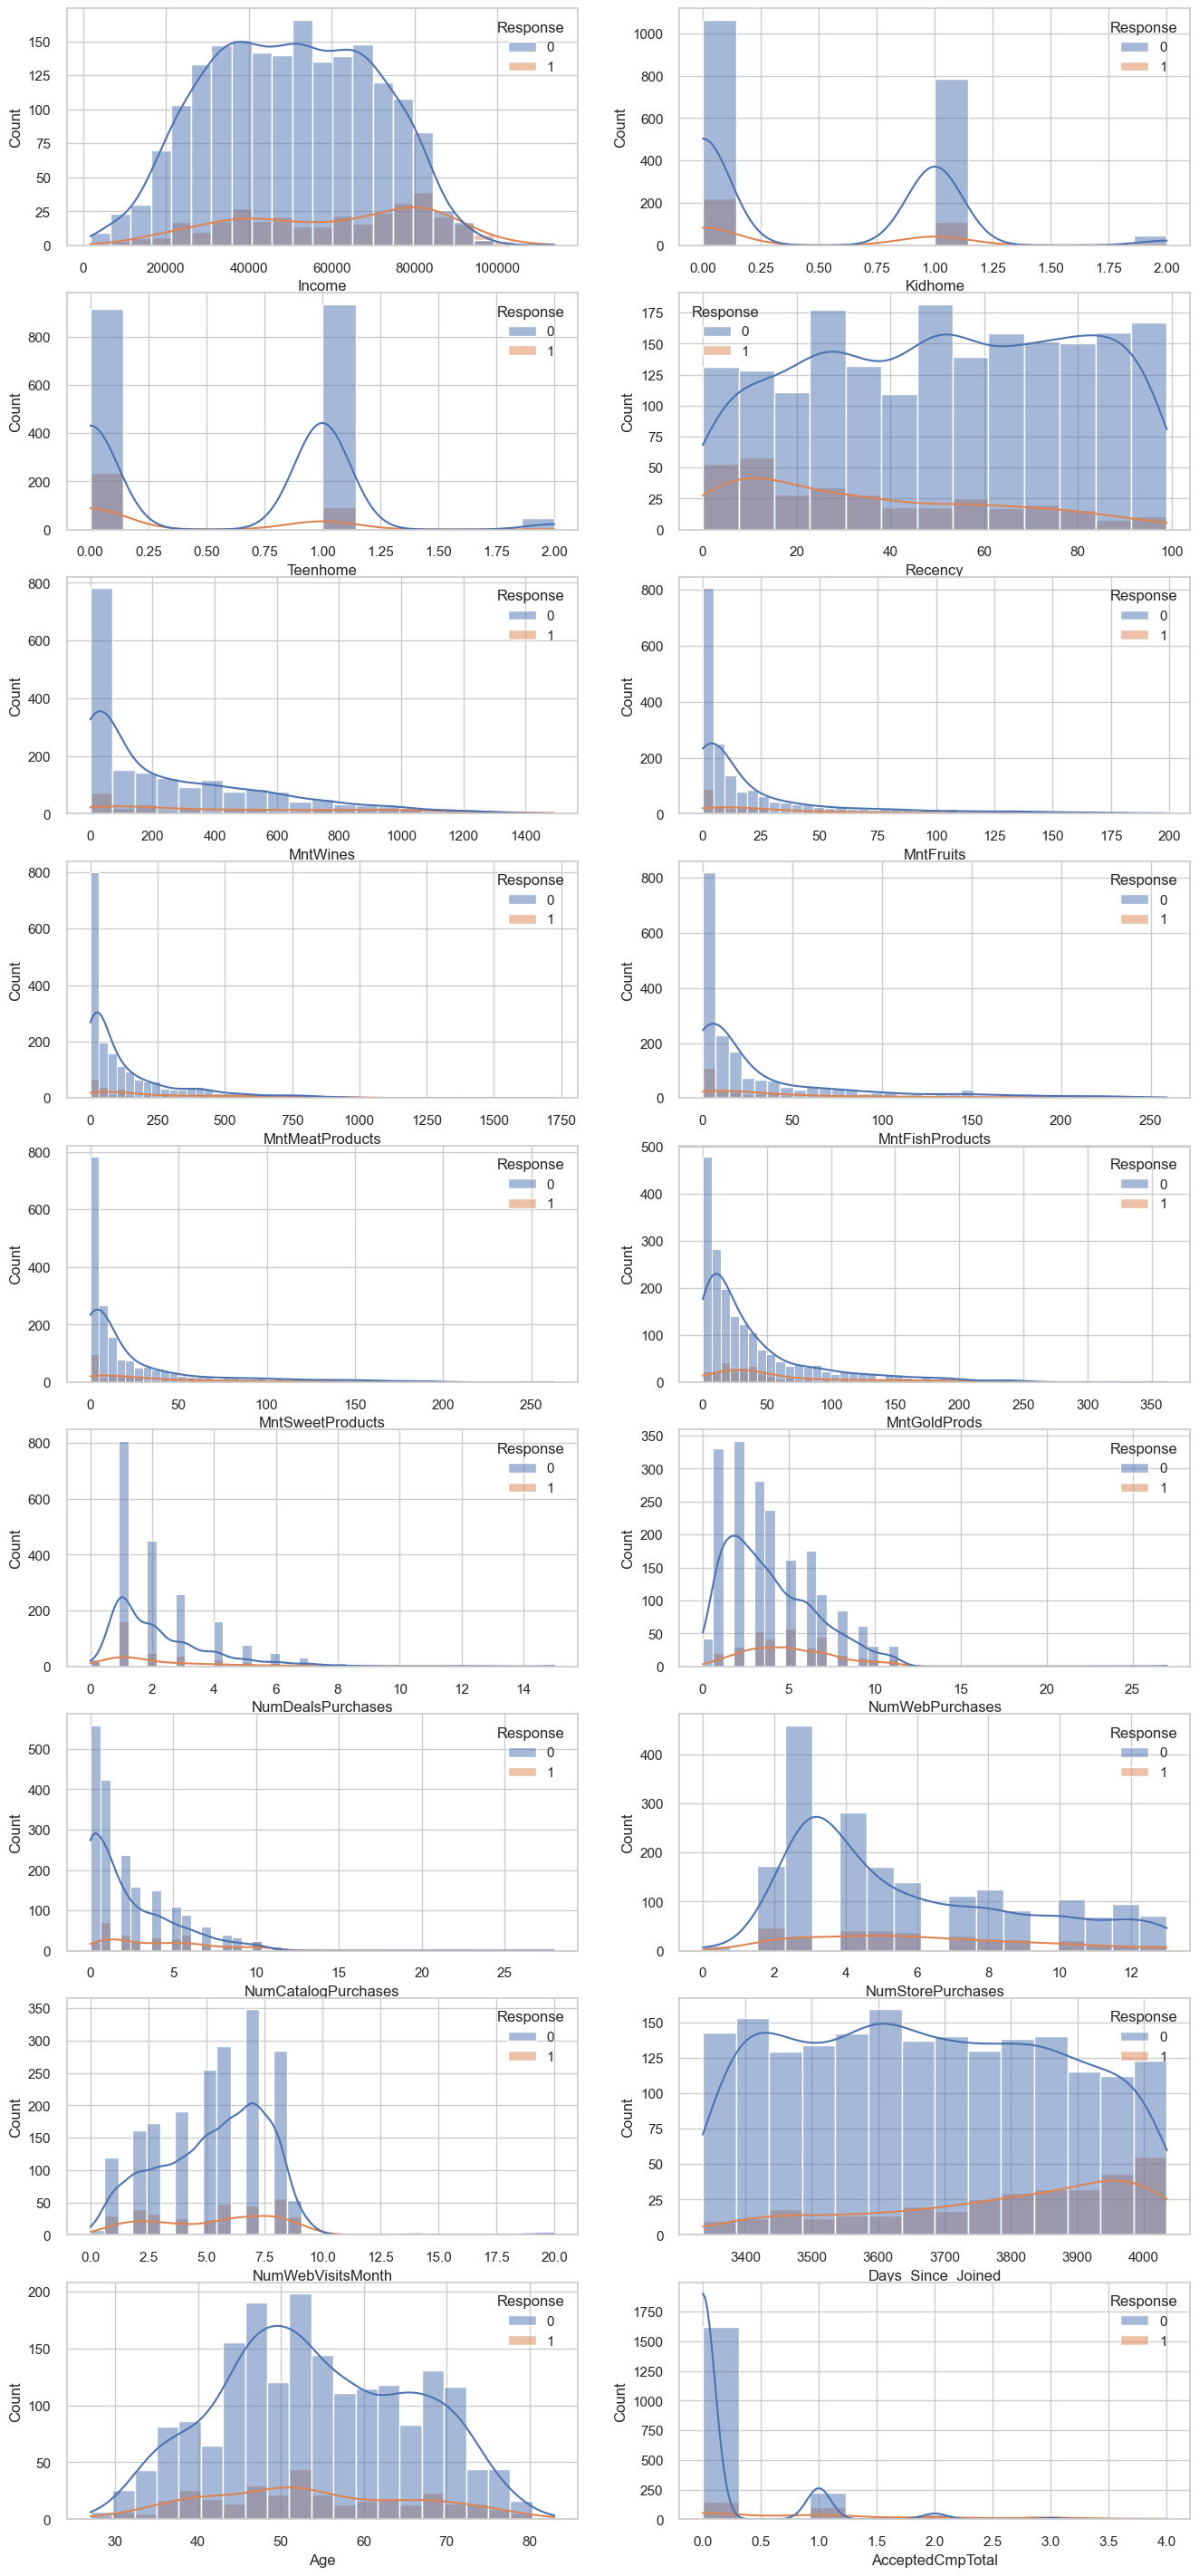

In [18]:
# Plot numerical features, 2 graphs per row.
fig, axes = plt.subplots( round(len(num_features)/2), 2, figsize=(16, round(4*len(num_features)/2)))
for i, feature in enumerate(num_features):
    x = i // 2
    y = i % 2
    sns.histplot(data=df_data, x=feature, hue=target, kde=True, ax=axes[x, y])

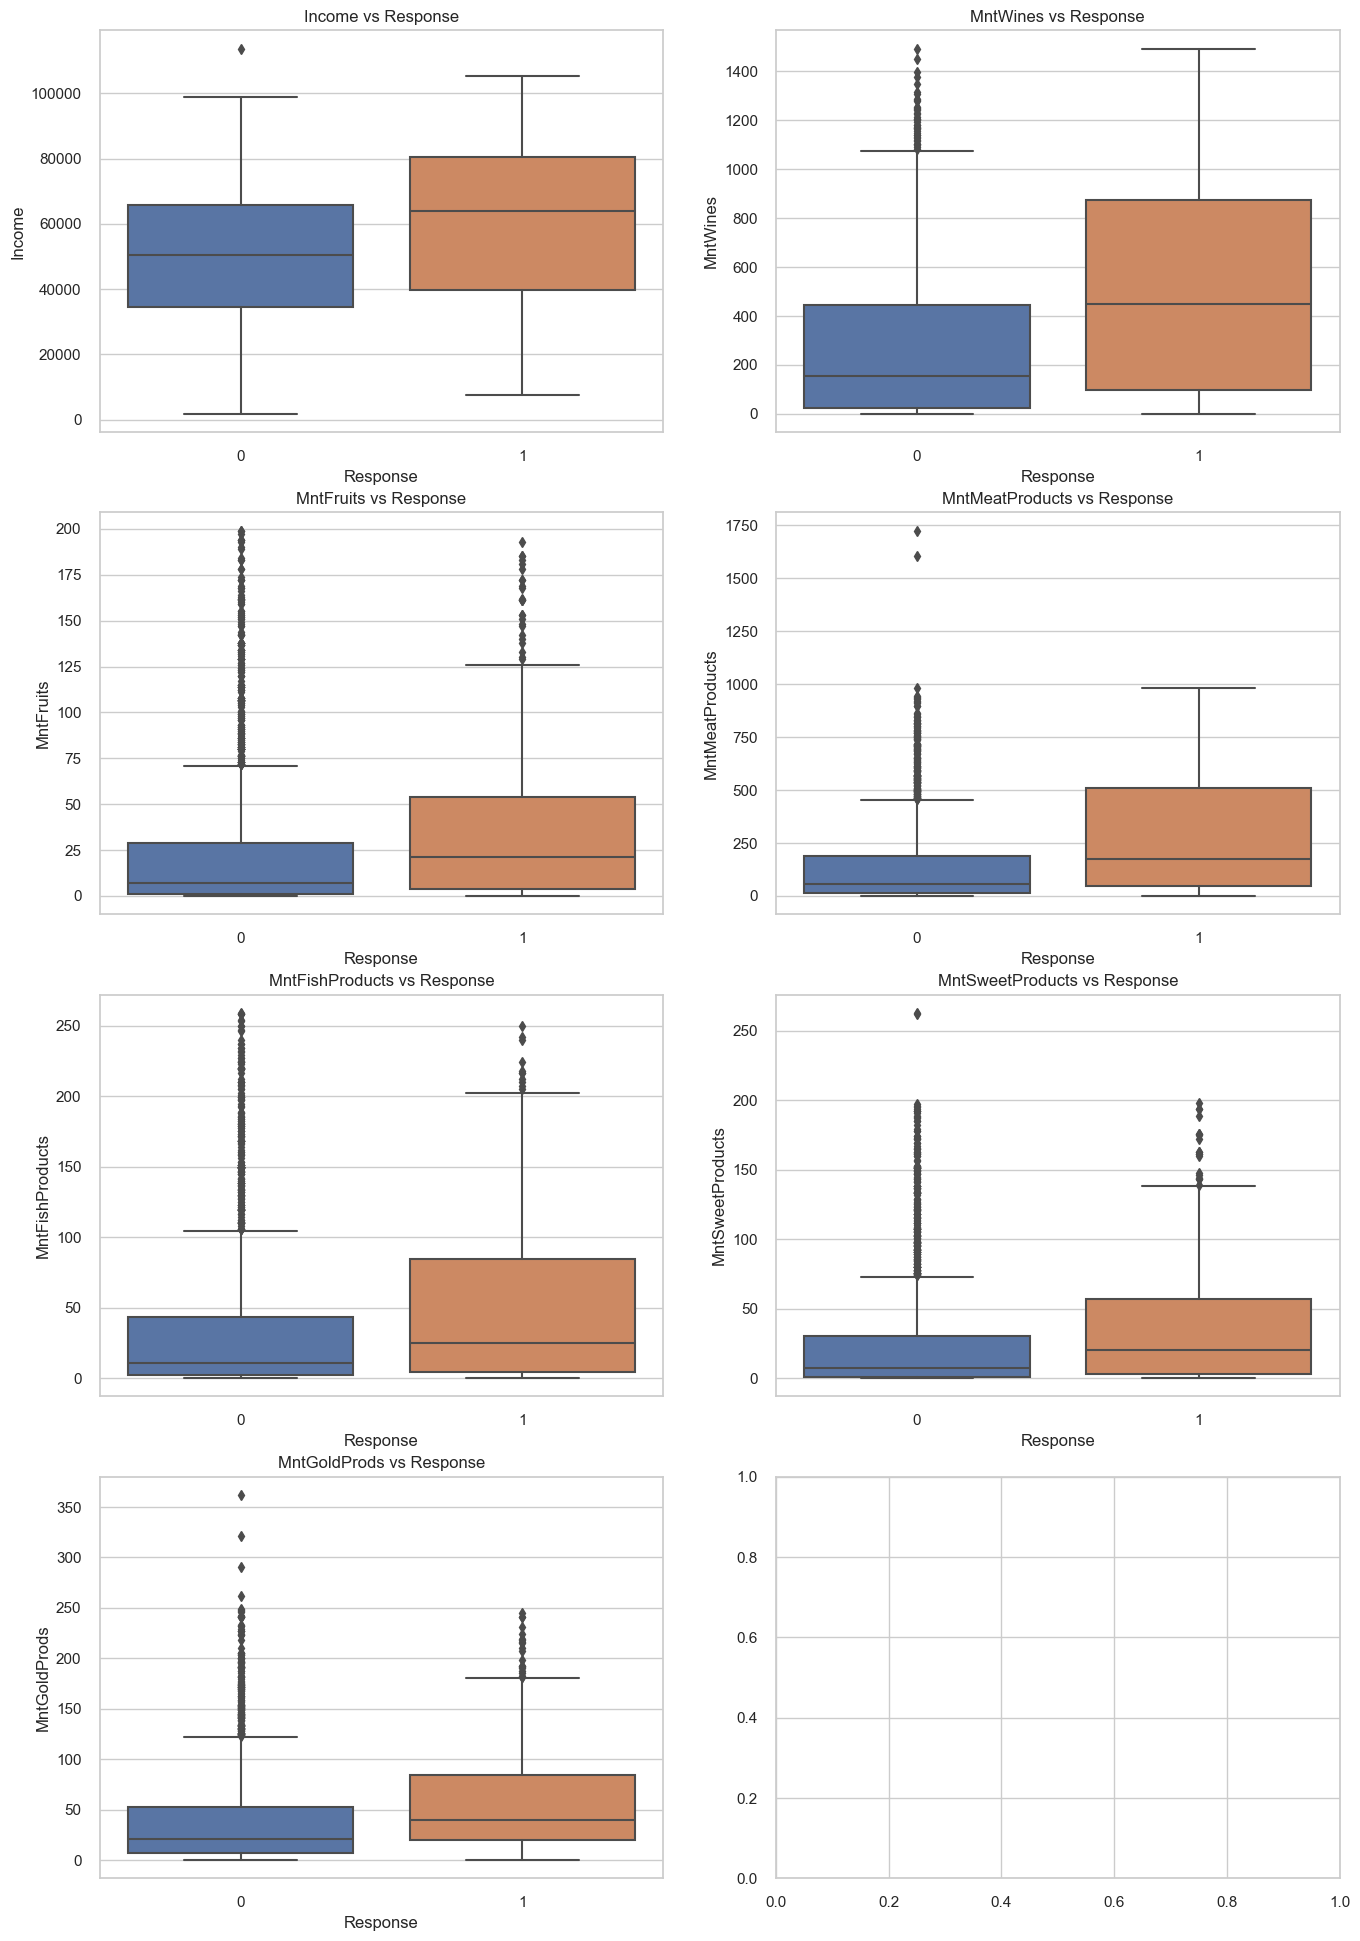

In [19]:
# Let's also look at how income and spending on different product categories affect the response.
# Create a subplot layout with 4 rows and 2 columns
fig, axes = plt.subplots(4, 2, figsize=(16, 24))

# Create boxplots for spending on different product categories grouped by 'Response'
product_cols = ["Income", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

for i, col in enumerate(product_cols):
    x = i // 2
    y = i % 2
    sns.boxplot(x=target, y=col, data=df_data, ax=axes[x, y])
    axes[x, y].set_title(f"{col} vs Response")
    

## Quick Summary On Findings Part One:


### Categorical Features:
1. "Education": Customers with different education levels seem to respond similarly to the campaign, with PhD holders who show a higher response rate.
2. "Marital_Status": Most customers are married or living together. The response rate is similar for different marital statuses, but single customers seem to have a slightly higher response rate.
3. "Childhome": Over 70% of our customers have children at home. However, the response rate tends to decrease, particularly when the number of children reaches three, no one responded to the campain. On the other hand, customers with no children seem to respond much more positively.

### Numerical Features:
1. "Income": Customers who accepted the offer have a slightly higher median income compared to those who did not.
2. "Kidhome" and "Teenhome": Most customers do not have kids or teenagers at home. However, customers with kids or teenagers at home seem to have a lower response rate.
3. "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds": The amount spent on different product categories is skewed positively. Customers who spend more, especially on wines, appear to have a higher response rate.
4. "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases": The number of purchases made through different channels is skewed positively. Customers who make more purchases, especially through the web and catalogs, appear to have a higher response rate.
5. "NumWebVisitsMonth": The number of website visits in the last month is distributed between 0 and 20, with a peak around 6 to 8 visits. The response rate seems to be lower for customers who visit the website more frequently.

## Analyzing Demographic Patterns and Spending Behavior

In this section, we delve into the relationship between customer demographics and their spending behaviors. We'll analyze how different demographic segments engage with various spending categories.

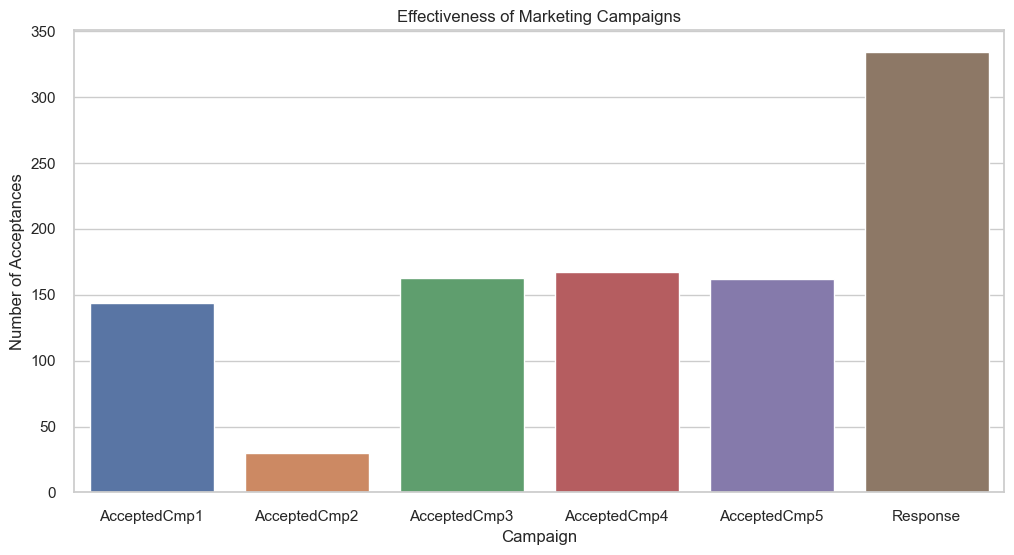

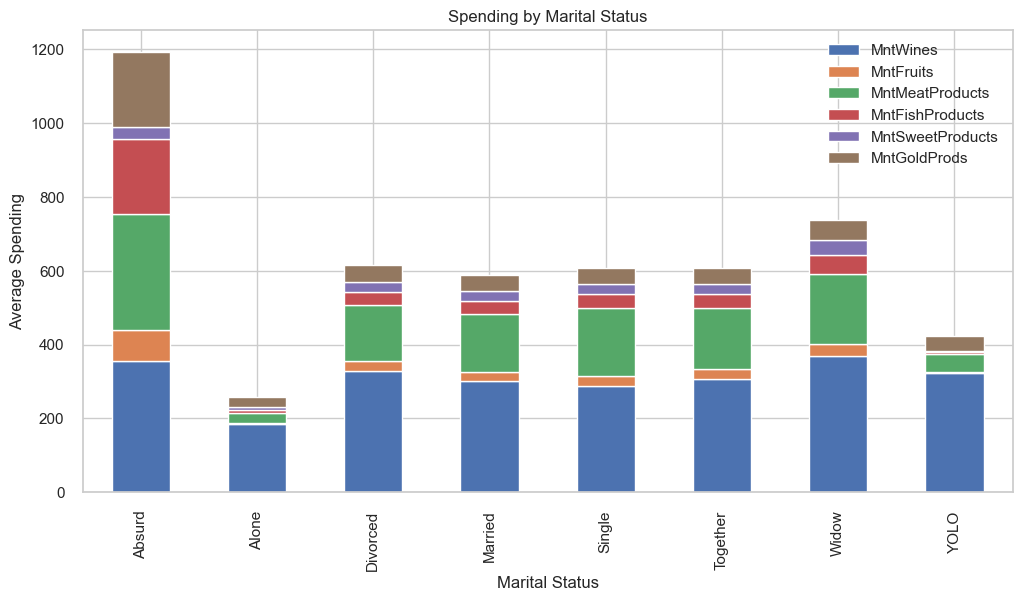

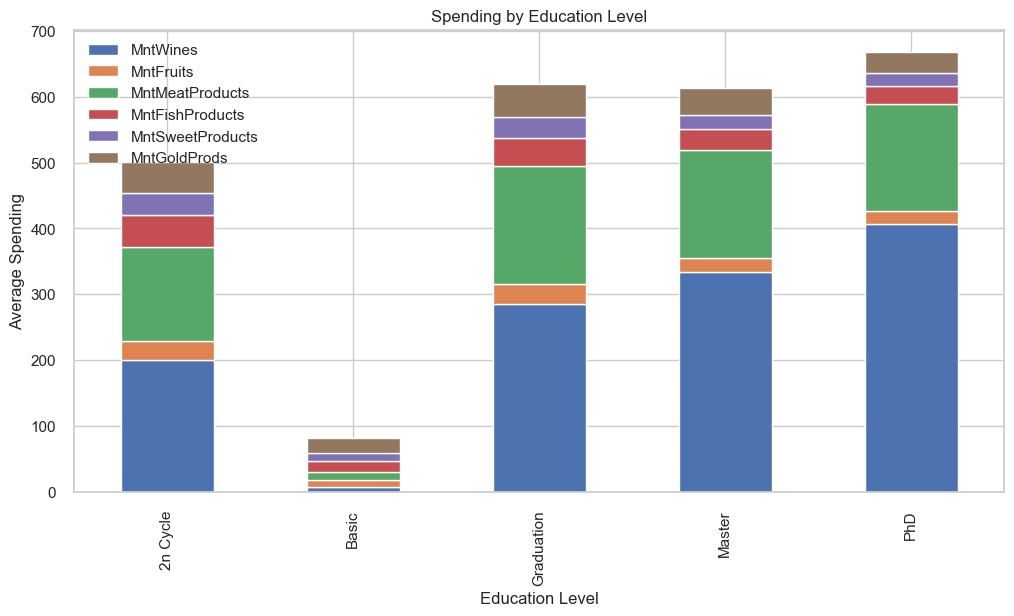

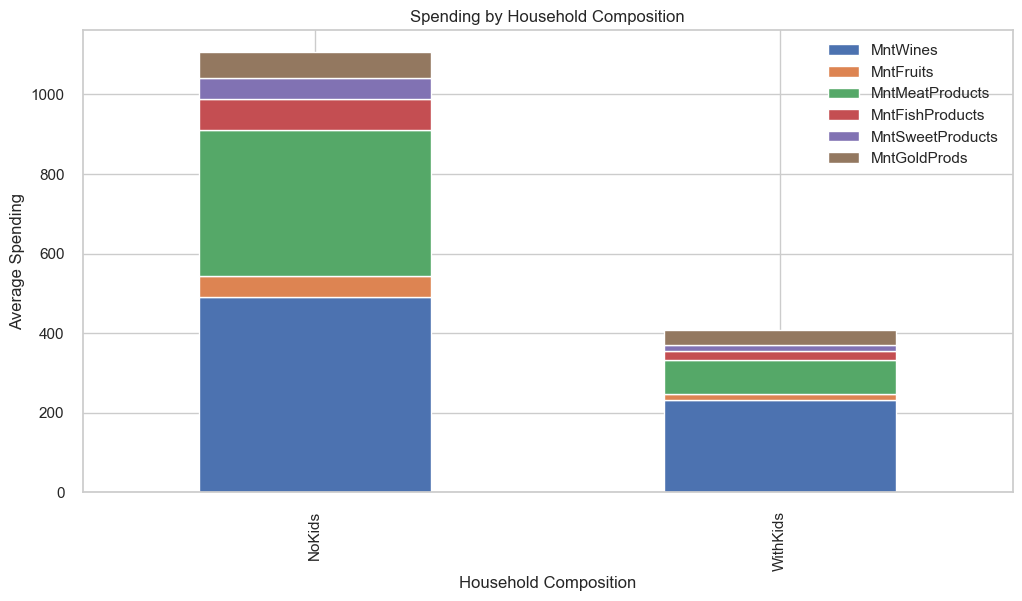

In [20]:
# Analyzing the effectiveness of previous marketing campaigns

# Accepted Campaigns
accepted_campaigns = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]
campaigns_summary = df_data[accepted_campaigns].sum().reset_index()
campaigns_summary.columns = ["Campaign", "Accepted_Count"]

# Plotting the accepted campaigns
plt.figure(figsize=(12, 6))
sns.barplot(x="Campaign", y="Accepted_Count", data=campaigns_summary)
plt.title("Effectiveness of Marketing Campaigns")
plt.xlabel("Campaign")
plt.ylabel("Number of Acceptances")
plt.show()

# Spending Analysis by marital status
spending_columns = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
spending_by_marital_status = df_data.groupby("Marital_Status")[spending_columns].mean().reset_index()

# Plotting spending by marital status
spending_by_marital_status.plot(x="Marital_Status", kind="bar", figsize=(12, 6), stacked=True)
plt.title("Spending by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Average Spending")
plt.show()

# Spending Analysis by Education Level
spending_by_education = df_data.groupby("Education")[spending_columns].mean().reset_index()

# Plotting spending by education level
spending_by_education.plot(x="Education", kind="bar", figsize=(12, 6), stacked=True)
plt.title("Spending by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Spending")
plt.show()

# Spending Analysis by Household Composition
Spending_by_household_composition = df_data.groupby(df_data["Childhome"].apply(lambda x: "NoKids" if x == 0 else "WithKids"))[spending_columns].mean().reset_index()

# Plotting spending by household composition
Spending_by_household_composition.plot(x="Childhome", kind="bar", figsize=(12, 6), stacked=True)
plt.title("Spending by Household Composition")
plt.xlabel("Household Composition")
plt.ylabel("Average Spending")
plt.show()

## Quick Summary On Findings Part Two:

### Effectiveness of Marketing Campaigns
* Some campaigns have been more successful than others, indicating that analyzing the characteristics of these campaigns might reveal what resonated with the customers.
* Understanding why certain campaigns were more effective can guide the design of future campaigns.

### Spending Analysis by Marital Status
* The stacked bar chart provides an overview of average spending across different categories, segmented by marital status.
* Different marital statuses show varying spending patterns. For example, "Married" and "Together" customers seem to spend more across different categories.
* These insights can be used to create targeted campaigns for specific marital statuses, aligning offers with their spending preferences.

### Spending Analysis by Education Level
* The stacked bar chart illustrates the average spending across different categories, segmented by education level.
* Customers with a "PhD" or "Master" degree tend to spend more across various categories, especially on wines and meat products.
* Customers with "Basic" education spend less on average, particularly in the wine and meat products categories.
* Spending patterns for customers with a "Graduation" or "2n Cycle" education level fall in between the other groups.

### Spending Analysis by Household Composition
* The stacked bar chart above illustrates the average spending by household composition, comparing households with children ("WithKids") and without children ("NoKids").
* Households without children tend to spend more on wines, fruits, meat products, and sweet products.
* On average, households with children spend only about 40% of the amount that households without children do.

In [21]:
# Based on findings so far, modify 'Marital_Status' into two types only: either they are singles or together.
# Values such as 'absurd' or 'yolo' will not be considered.
df_data["Marital_Status"].replace(["Alone", "Divorced", "Widow"], "Single", inplace=True)
df_data["Marital_Status"].replace(["Married"], "Together", inplace=True)
df_data = df_data[(df_data["Marital_Status"] == "Single") | (df_data["Marital_Status"] == "Together")]

# Rename the column to "Living_Status"
df_data.rename(columns={"Marital_Status": "Living_Status"}, inplace=True)
df_data["Living_Status"].value_counts()

Together    1436
Single       789
Name: Living_Status, dtype: int64

## Examining Spending Patterns and Customer Behavior Based On Purchase Categories

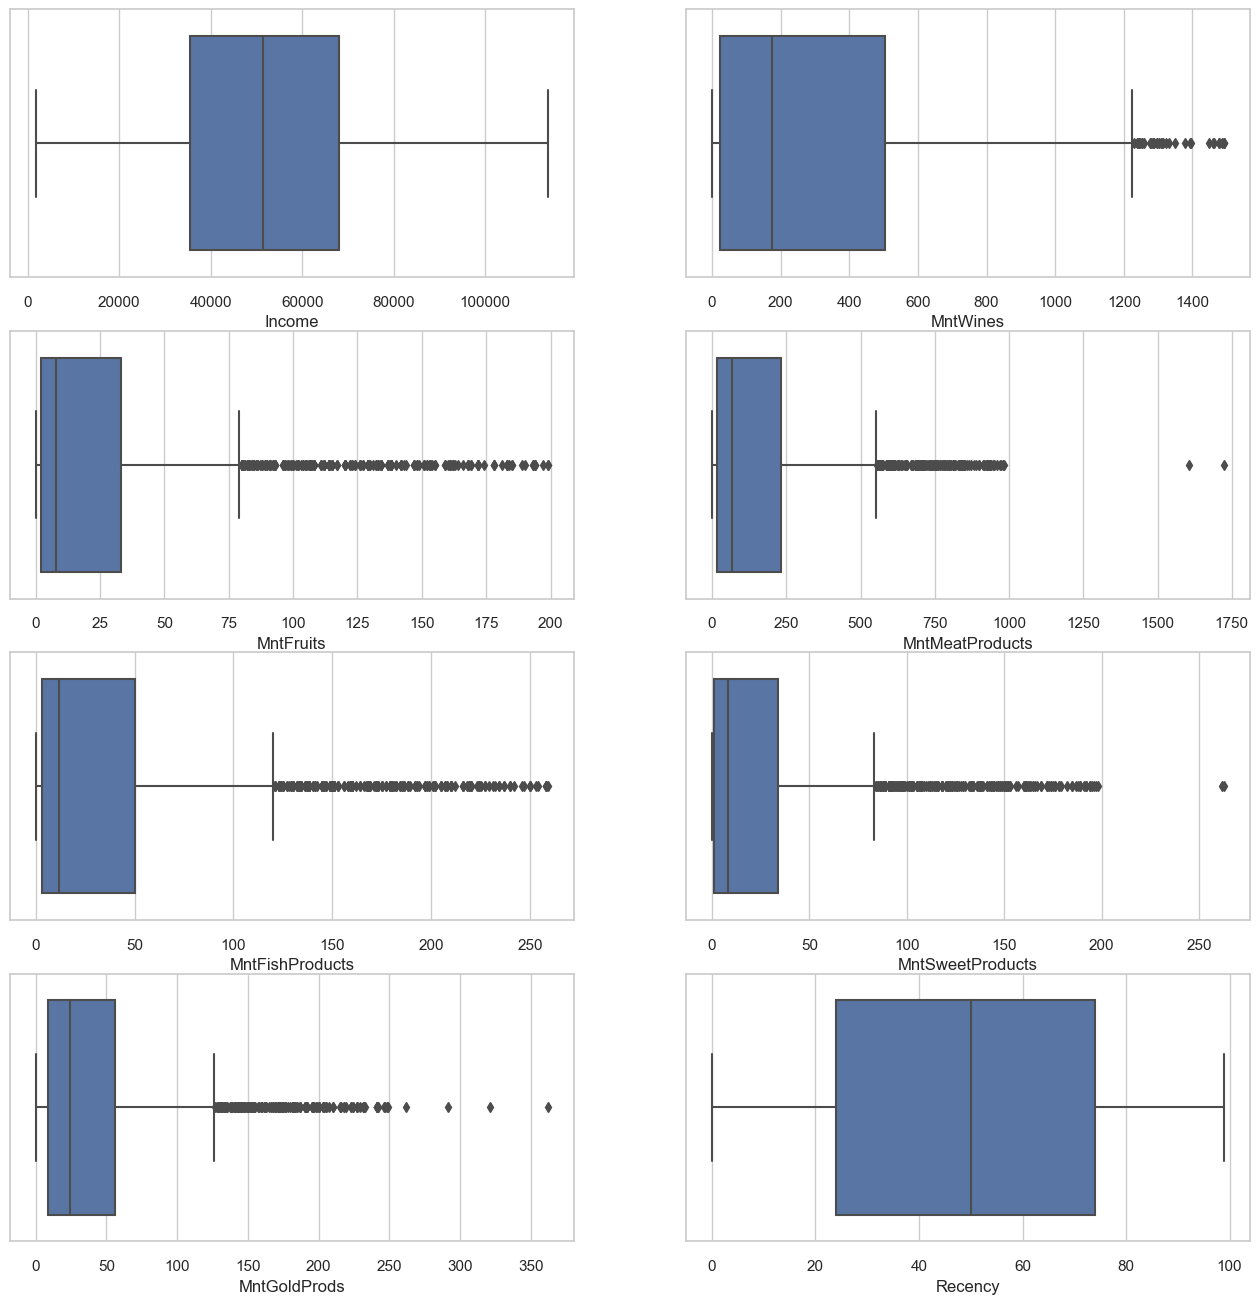

In [22]:
# Creating another DataFrame for Pair Plots
# Selecting key numerical features for pair plot
pair_plot_columns = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Recency']
df_pair_plot_data = df_data[pair_plot_columns]

# Plot numerical features, 2 graphs per row.
fig, axes = plt.subplots( round(len(pair_plot_columns)/2), 2, figsize=(16, round(4*len(pair_plot_columns)/2)))
for i, feature in enumerate(pair_plot_columns):
    x = i // 2
    y = i % 2
    sns.boxplot(data=df_pair_plot_data, x=feature, ax=axes[x, y])

In [23]:
df_data.shape

(2225, 28)

### Examing On Some Of The Extreme Outliers

In [24]:
# Extreme Outliers of "MntMeatProducts"
df_data[df_data["MntMeatProducts"] > 1500]

Education Living_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
21    Graduation      Together   2447.0        1         0       42         1   
2228    2n Cycle      Together  51381.5        0         0       53        32   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
21            1             1725                1                 1   
2228          2             1607               12                 4   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
21               1                 15                0                   28   
2228            22                  0                0                    0   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
21                    0                  1             0             0   
2228                  1                  0             0             1   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
21               0             0             0         0         0   
2228             0             0             0         0         0   

      Days_Since_Joined  Age  AcceptedCmpTotal  Childhome  
21                 3875   44                 0          1  
2228               4022   45                 1          0

In [25]:
# Extreme Outliers of "MntSweetProducts"
df_data[df_data["MntSweetProducts"] > 250]

Education Living_Status    Income  Kidhome  Teenhome  Recency  \
27    Graduation        Single   51381.5        1         0       19   
1898         PhD        Single  113734.0        0         0        9   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
27           5          1                3                3               263   
1898         6          2                3                1               262   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
27             362                  0               27                    0   
1898             3                  0               27                    0   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
27                    0                  1             0             0   
1898                  0                  1             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
27               0             0             0         0         0   
1898             0             0             0         0         0   

      Days_Since_Joined  Age  AcceptedCmpTotal  Childhome  
27                 3830   37                 0          1  
1898               3368   78                 0          0

In [26]:
# Extreme Outliers of "MntGoldProds"
df_data[df_data["MntGoldProds"] > 300]

Education Living_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
27    Graduation        Single  51381.5        1         0       19         5   
1975  Graduation      Together   4428.0        0         1        0        16   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
27            1                3                3               263   
1975          4               12                2                 4   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
27             362                  0               27                    0   
1975           321                  0               25                    0   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
27                    0                  1             0             0   
1975                  0                  1             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
27               0             0             0         0         0   
1975             0             0             0         0         0   

      Days_Since_Joined  Age  AcceptedCmpTotal  Childhome  
27                 3830   37                 0          1  
1975               3603   54                 0          1

In [27]:
# We will be removing these rows for the purpose of visualizing the pair plot.
# The original dataset will not be affected.
pair_plot_columns.append(target)

# Filtering out Extreme Outliers for pair plot visualization
df_pair_plot_data = df_data[(df_data["MntMeatProducts"] < 1500) &
                                      (df_data["MntSweetProducts"] < 250) &
                                      (df_data["MntGoldProds"] < 300)]

# Selecting relevant columns for the pair plot
df_pair_plot_data = df_pair_plot_data[pair_plot_columns]

# Printing the shape of the original and filtered datasets
print("Original dataset shape:", df_data.shape)
print("Filtered dataset shape:", df_pair_plot_data.shape)

# Defining a function to create an interactive pair plot
def size_widget(height=2, aspect=2):
    sns.pairplot(df_pair_plot_data, diag_kind='kde', kind='reg', hue=target, plot_kws={'line_kws':{'color':'black'}}, height=height, aspect=aspect)

# Creating an interactive widget to control pair plot size
interactive( size_widget, height=(1, 3.5, 0.5), aspect=(0.5, 2, 0.25))



Original dataset shape: (2225, 28)
Filtered dataset shape: (2220, 9)


interactive(children=(FloatSlider(value=2.0, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

## Quick Summary On Findings Part Three:

### Income and Spending Correlations
* Income and Spending Categories: There are visible positive correlations between income and spending on categories like wines, meat products, fish products, and gold products. This suggests that higher-income customers tend to spend more on these products.
* Weaker Correlations with Other Categories: Correlations with fruits and sweets are weaker, indicating that income might not be a strong predictor for spending in these areas.
* Response Differentiation: The coloring based on "Response" suggests some differentiation, particularly in spending on wines and meat products.

### Inter-Category Spending Relationships
* Positive Correlations: Spending across different categories exhibits positive correlations. For example, customers spending more on wines are likely to spend more on meat and fish products.
* Bundling Opportunities: These correlations suggest opportunities for bundling products or creating targeted offers for customers with specific spending patterns.

### Recency Patterns
* No Strong Linear Correlations: Recency doesn't show strong linear correlations with spending or income, indicating a more complex relationship that might require further analysis.

### Distribution Insights (KDE)
* Right-Skewed Distributions: The KDE plots on the diagonal reveal right-skewed distributions for most spending categories. This suggests that most customers spend lower amounts, with a few spending significantly more.
* Response Distribution: Different KDE peaks for the "Response" variable in some features may provide insights into customer segments that respond differently to marketing or offers.

### Implications for Marketing and Strategy
* Targeted Offers: Tailor offers and promotions to different income levels, reflecting observed spending patterns.
* Product Bundling: Consider creating bundles of products that are commonly purchased together, such as wines and meat products.

## Features Correlation Analysis

In [28]:
# Calculate the correlation matrix
corr_matrix = df_data.corr()

# Print the correlation matrix
print(corr_matrix)


                       Income   Kidhome  Teenhome   Recency  MntWines  \
Income               1.000000 -0.527365  0.043231  0.006255  0.728360   
Kidhome             -0.527365  1.000000 -0.036532  0.008075 -0.498419   
Teenhome             0.043231 -0.036532  1.000000  0.017685  0.003987   
Recency              0.006255  0.008075  0.017685  1.000000  0.016819   
MntWines             0.728360 -0.498419  0.003987  0.016819  1.000000   
MntFruits            0.534688 -0.373591 -0.175772 -0.004470  0.387777   
MntMeatProducts      0.694151 -0.443702 -0.266434  0.025998  0.586774   
MntFishProducts      0.549860 -0.388778 -0.203286  0.000431  0.399390   
MntSweetProducts     0.549933 -0.372471 -0.163298  0.022145  0.384852   
MntGoldProds         0.411608 -0.350610 -0.018979  0.017110  0.386095   
NumDealsPurchases   -0.130782  0.232574  0.395132 -0.000656  0.014045   
NumWebPurchases      0.494411 -0.364924  0.153792 -0.008777  0.541032   
NumCatalogPurchases  0.706651 -0.517734 -0.110337  

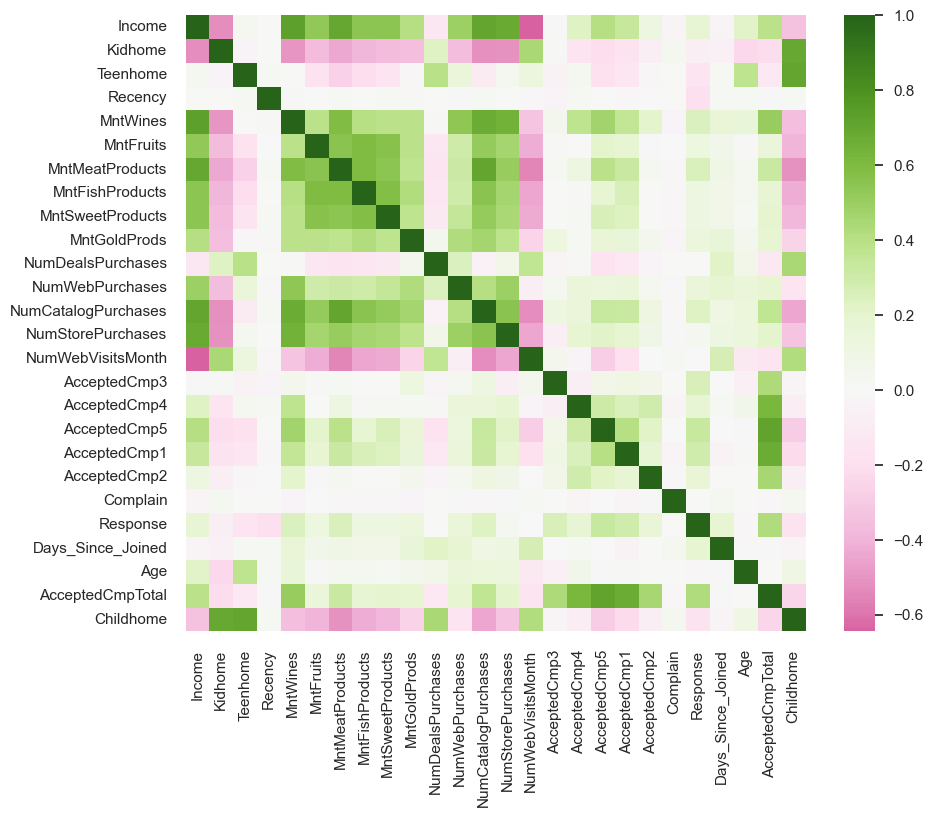

In [29]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='PiYG', center=0)
plt.show()

In [30]:
# More Feature Engineering after reviewing the heatmap
# It seems that the total amount spent on features related to the last two years shows a high correlation.
# Total spent across all products
df_data["MntTotal"] = df_data.loc[:, ["MntFishProducts", "MntMeatProducts", "MntSweetProducts",
                                  "MntGoldProds", "MntWines", "MntFruits"]].sum(axis=1)

# Total spent across regular products which consise with RFM modeling
df_data["MntRegTotal"] = df_data.loc[:, ["MntFishProducts", "MntMeatProducts", "MntSweetProducts",
                                  "MntWines", "MntFruits"]].sum(axis=1)

# The number of purchases across all channels also shows a high correlation, which coincides with RFM modeling.
# Total number of purchases across all channels
df_data["NumPurchasesTotal"] = df_data.loc[:, ["NumWebPurchases", "NumCatalogPurchases",
                                  "NumStorePurchases"]].sum(axis=1)


### ToDo

As mentioned above, there are still some areas where we could delve deeper. This would require additional time and more information from stakeholders. We could focus more on demographic-related analysis and potentially conduct further exploratory data analysis on the newly engineered features.

# 2 Customer Segmentation

## RFM (Recency-Frequency-Monetary) Modeling

Recency, frequency, monetary value (RFM) is a model used in marketing analysis that segments a company’s consumer base by their purchasing patterns or habits. In particular, it evaluates customers’ recency (how long ago they made a purchase), frequency (how often they make purchases), and monetary value (how much money they spend).

This model is known to find an organization's best customers, which aligns with our objective, plus it will handle skewness problem we might face later for k-means algorithm.

In [31]:
# We have previously defined these features already, with columns like "Recency"(R), "NumPurchasesTotal"(F), "MntTotal"(M)
def assign_rfm_labels ( df_customers, rfm_criteria, output_column, keep_criteria=True):
    #    This function calculates RFM values and assigns them to the destination columns

    #    Args:
    #    df_customers - Dataframe that contains customer info
    #    rfm_criteria - A list containing criteria columns in RFM order
    #    output_column - Name of the column that stores criteria rfm value
    #
    
    #    Returns:
    #    df_customers - A modified Dataframe
    
    # Calculate Recency value, more recent is better, aka less is better
    df_customers["R Score"] = pd.qcut( df_customers[rfm_criteria[0]], 4, labels=[4, 3, 2, 1] ).astype(int)
    
    # Calculate Frequency value, higher the better
    df_customers["F Score"] = pd.qcut( df_customers[rfm_criteria[1]], 4, labels=[1, 2, 3, 4] ).astype(int)
    
    # Calculate Monetary value, higher the better
    df_customers["M Score"] = pd.qcut( df_customers[rfm_criteria[2]], 4, labels=[1, 2, 3, 4] ).astype(int)
    
    # Total RFM value
    df_customers[output_column] = df_customers["R Score"] + df_customers["F Score"] + df_customers["M Score"]
    
    # Check if there is a need to drop the three value columns
    if not keep_criteria: df_customers.drop(["R Score", "F Score", "M Score"], axis=1, inplace=True)
    
    return df_customers


In [32]:
# RFM columns in our dataset
rfm_col = ["Recency", "NumPurchasesTotal", "MntRegTotal"]

# calculates RFM values and assigns them to "RFM Score"
df_data = assign_rfm_labels (df_data, rfm_col, "RFM Score")
df_data.head(10)

Education Living_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation        Single  58138.0        0         0       58       635   
1  Graduation        Single  46344.0        1         1       38        11   
2  Graduation      Together  71613.0        0         0       26       426   
3  Graduation      Together  26646.0        1         0       26        11   
4         PhD      Together  58293.0        1         0       94       173   
5      Master      Together  62513.0        0         1       16       520   
6  Graduation        Single  55635.0        0         1       34       235   
7         PhD      Together  33454.0        1         0       32        76   
8         PhD      Together  30351.0        1         0       19        14   
9         PhD      Together   5648.0        1         1       68        28   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   
5         42               98                0                42   
6         65              164               50                49   
7         10               56                3                 1   
8          0               24                3                 3   
9          0                6                1                 1   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   
5            14                  2                6                    4   
6            27                  4                7                    3   
7            23                  2                4                    0   
8             2                  1                3                    0   
9            13                  1                1                    0   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   
5                 10                  6             0             0   
6                  7                  6             0             0   
7                  4                  8             0             0   
8                  2                  9             0             0   
9                  0                 20             1             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0         0         1   
1             0             0             0         0         0   
2             0             0             0         0         0   
3             0             0             0         0         0   
4             0             0             0         0         0   
5             0             0             0         0         0   
6             0             0             0         0         0   
7             0             0             0         0         0   
8             0             0             0         0         1   
9             0             0             0         0         0   

   Days_Since_Joined  Age  AcceptedCmpT

## K-Means algorithm
K-Means algorithm uses the clustering method to group identical data points in one group and all the data points in that group share common features but are distinct when compared to data points in other groups.

Points in the same group are as similar as possible.  
Points in different groups are as dissimilar as possible.

### Application in Customer Segmentation:
In our case, we applied the K-Means algorithm to identify distinct customer segments based on their behavior and preferences. By clustering customers into groups with similar characteristics, we can achieve the following:

* Targeted Marketing: Create personalized marketing strategies that resonate with specific customer segments.
* Enhanced Customer Experience: Recognize patterns in customer behavior to provide tailored recommendations and experiences.
* Strategic Focus: Direct resources and efforts towards the most promising customer groups, enhancing efficiency and effectiveness in our approach.


In [71]:
# Function to Check for Skewness Before Applying K-means Clustering
def check_skewness(dataframe, column_name):
    
    #This function checks the skewness of a specified column in a DataFrame and displays its distribution plot.
    
    #Parameters:
    #dataframe (DataFrame): The DataFrame containing the data.
    #column_name (str): The name of the column to be checked for skewness.
    
    #Returns:
    #None

    # Calculate the skewness of the specified column
    skewness = stats.skew(dataframe[column_name])
    
    # Perform a skewness test
    skewness_test = stats.skewtest(dataframe[column_name])
    
    # Display the distribution plot of the column
    plt.title('Distribution of ' + column_name)
    sns.distplot(dataframe[column_name])
    
    # Print skewness and skewness test results
    print(f"{column_name}'s Skewness: {skewness:.2f}, Skewtest: {skewness_test}")


R Score's Skewness: -0.03, Skewtest: SkewtestResult(statistic=-0.5108258920166102, pvalue=0.6094729771676289)


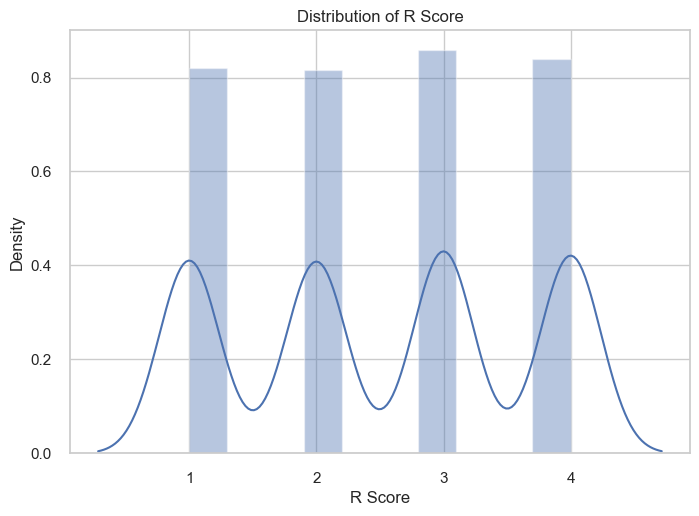

In [34]:
# Checking skewness of the 'R Score' column before applying K-means Clustering
check_skewness(df_data, "R Score")

F Score's Skewness: 0.05, Skewtest: SkewtestResult(statistic=1.0513427080877762, pvalue=0.2931012186823818)


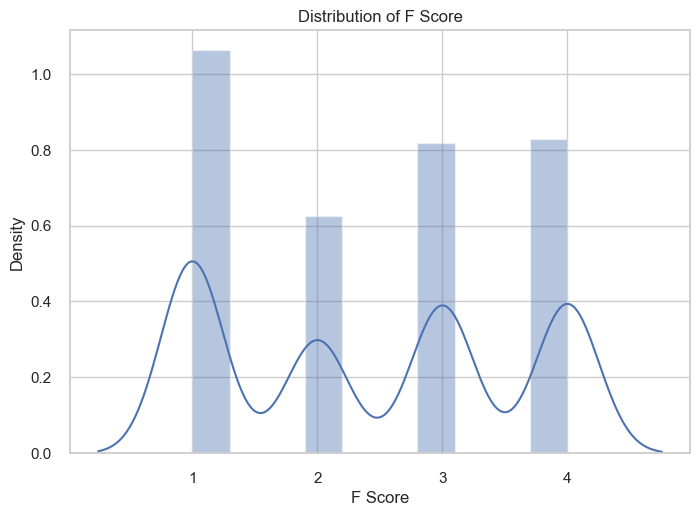

In [35]:
# Checking skewness of the 'F Score' column before applying K-means Clustering
check_skewness(df_data, "F Score")

M Score's Skewness: 0.00, Skewtest: SkewtestResult(statistic=0.03882665778528535, pvalue=0.9690285910157772)


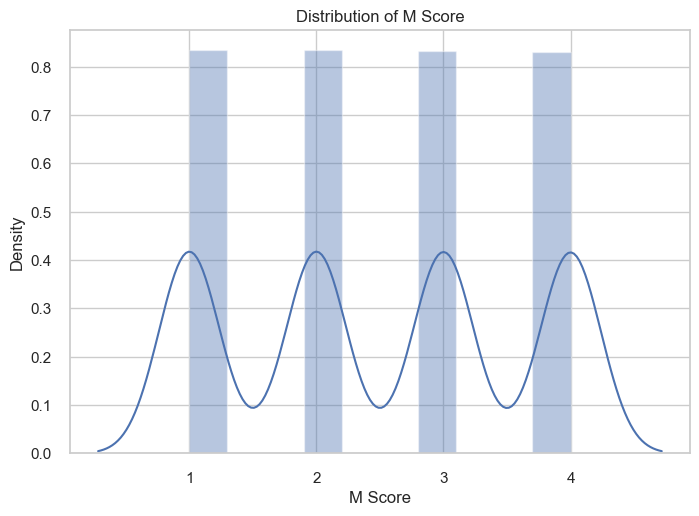

In [36]:
# Checking skewness of the 'M Score' column before applying K-means Clustering
check_skewness(df_data, "M Score")

RFM Score's Skewness: -0.05, Skewtest: SkewtestResult(statistic=-1.0454969242647767, pvalue=0.29579336138561063)


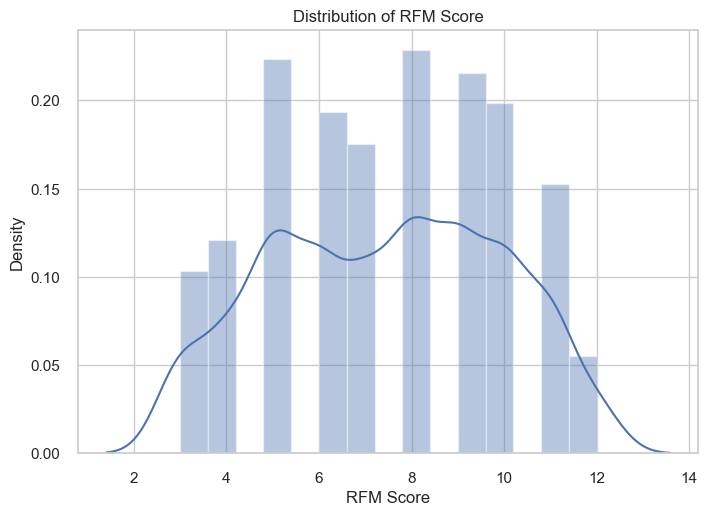

In [37]:
# Checking skewness of the 'RFM Score' column before applying K-means Clustering
check_skewness(df_data, "RFM Score")

### Customer Segmentation Using K-Means Clustering

In this section, we will group customers into distinct segments based on their RFM scores.

In [67]:
# Preprocess data by encoding categorical features and scaling numerical features.

# Not using categorical features
categorical_features = []

# Using RFM as numerical features
numerical_features = ["R Score", "F Score", "M Score", "RFM Score"]


features = numerical_features + categorical_features

Kmeans_preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)])

# Apply transformations to the data
df_preprocessed = Kmeans_preprocessor.fit_transform(df_data[features])

# Get the transformed feature names after one-hot encoding
transformed_feature_names = list(numerical_features)# + list(Kmeans_preprocessor.transformers_[1][1].get_feature_names_out(categorical_features))

# The output is a numpy array, we convert it back to dataframe
df_preprocessed = pd.DataFrame(df_preprocessed, columns=transformed_feature_names)

# Show the first few rows of the preprocessed data
df_preprocessed.head()

R Score   F Score   M Score  RFM Score
0 -0.462280  1.343696  1.343291   1.035130
1  0.433689 -1.212351 -1.340476  -0.984481
2  0.433689  1.343696  0.448702   1.035130
3  0.433689 -1.212351 -1.340476  -0.984481
4 -1.358249  0.491680  0.448702  -0.176636

### Elbow Method
This method helps us determine the optimal number of clusters (k) for segmenting our dataset.

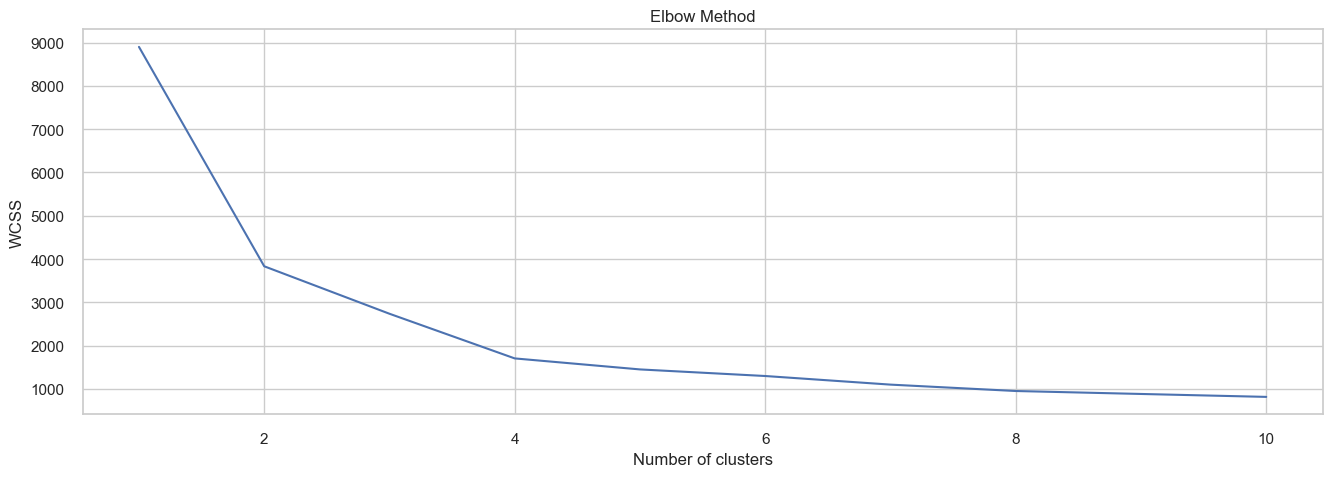

In [39]:
# Initialize an empty list to store Within-Cluster Sum of Squares (WCSS) values
wcss = []

# Iterate over different numbers of clusters to find optimal K
for i in range(1, 11):
    # Create a KMeans instance with specified parameters
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    
    # Fit the KMeans model to the preprocessed data
    kmeans.fit(df_preprocessed)
    
    # Append the calculated inertia (WCSS) to the list
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.figure(figsize=(16, 5))
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel('WCSS')
plt.show()

In [40]:
# Apply K-Means with the optimal number of clusters "4"
kmeans = KMeans(n_clusters=4, init="k-means++", max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit(df_preprocessed)

# Assign each customer to a cluster
df_data["Cluster"] = kmeans.labels_


### Cluster Analysis:
#### Center Examination

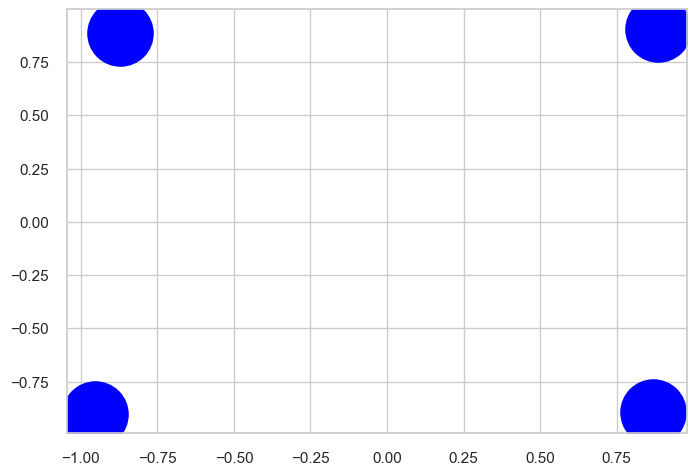

In [41]:
# Scatter plot to visualize the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=2200, c='blue')
plt.show()

#### Density and Separation

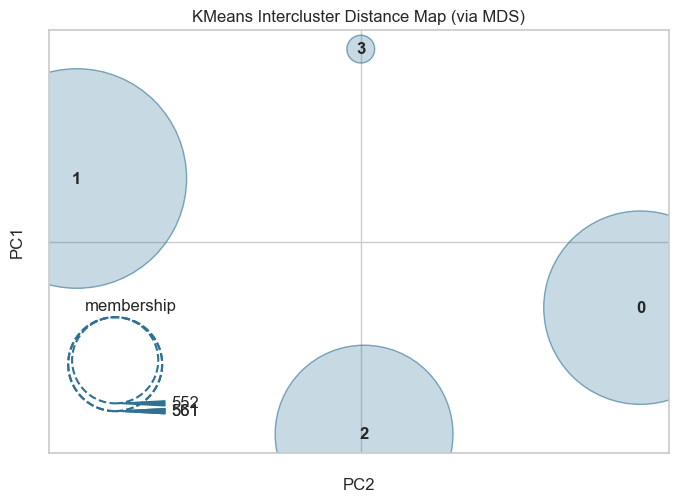

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [42]:
# Evaluate the density and separation between clusters using InterclusterDistance
visualizer = InterclusterDistance(kmeans)

# Fit the visualizer on the preprocessed data
visualizer.fit(df_preprocessed)

# Display the visualization
visualizer.show()

#### Silhouette Score

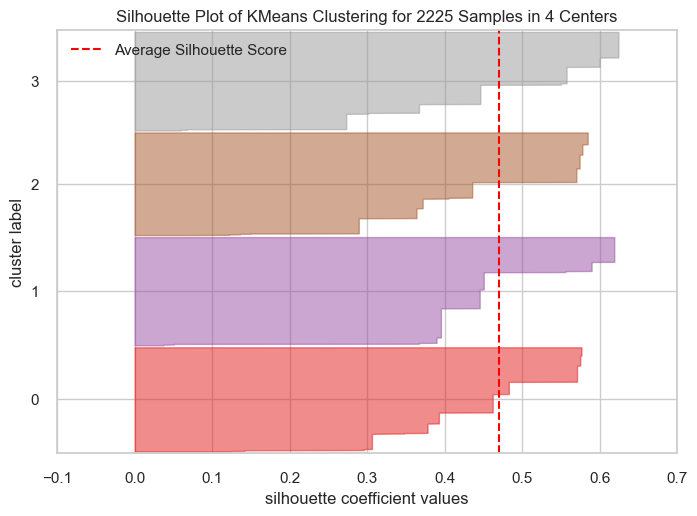

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2225 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [43]:
# Create a SilhouetteVisualizer using the k-means model
visualizer = SilhouetteVisualizer(kmeans)

# Fit the visualizer with the preprocessed data
visualizer.fit(df_preprocessed)

# Display the silhouette visualization
visualizer.poof()


In [72]:
# Calculating the silhouette score
silhouette_avg = silhouette_score(df_preprocessed, clusters.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.47071633427884396


## Quick Summary Of Clustering:

* Cluster Centers: The blue dots represent the centroids or centers of the four clusters. These centers act as a kind of "average" or "representative" point for all the data points in each cluster. This separation indicates a good clustering result.
* Spacing Between Clusters: The clusters appear to be well-separated from each other, meaning that the data points within each cluster are closer to each other than they are to the points in other clusters. This also indicates a good clustering result.
* Silhouette Score: The average silhouette score of 0.471 in our case indicates a reasonable structure has been found.

## Examing on The Characteristics of Each Cluster 

In [45]:
fig = px.scatter_3d(df_data, x="R Score", y="F Score", z="M Score", color=df_data['Cluster'],
                   labels={'0':'Recency','1':'Frequency','2':'Monetary'})

# Show the figure
fig.show()

* Cluster 0: This cluster seems to represent customers with a medium R Score (Recency), medium to high F Score (Frequency), and a medium to high M Score (Monetary value). These customers have moderate recent engagement, are fairly frequent buyers, and contribute significant monetary value.

* Cluster 1: Customers in this cluster have a high R Score, low to medium F Score, and a low to medium M Score. This group may represent customers who haven't made purchases recently but have a varied frequency and monetary contribution.

* Cluster 2: This cluster is characterized by a low R Score, high F Score, and high M Score. Customers in this group have recently engaged with the brand, frequently make purchases, and contribute a high monetary value.

* Cluster 3: Customers in this cluster have a medium R Score, low F Score, and low M Score. They have moderate recent engagement and lower frequency and monetary contributions compared to other clusters.

### Summary:

* Cluster 2 seems to be the most valuable segment, with recent engagement, high frequency, and high monetary contributions.
* Cluster 1 may need re-engagement strategies, as they show high recency but lower frequency and monetary value.
* Cluster 0 represents a balanced segment that might benefit from targeted promotions to increase engagement.
* Cluster 3 appears to be a lower-value segment that might need specific strategies to increase both frequency and monetary contributions.

<Axes: xlabel='Cluster', ylabel='count'>

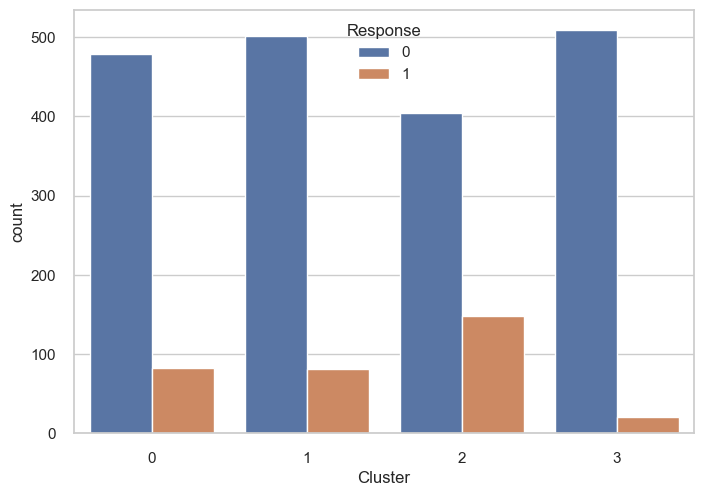

In [73]:
# response by cluster
sns.countplot(data=df_data, x="Cluster", hue=target)

#### This aligns with our previous findings. With CLuster 2 has the highiest response rate and 3 has the lowest.

In [47]:
# Number of customer at eatch cluster
# This code snippet prints the count of customers in each cluster, providing an overview of cluster distribution.
print(df_data["Cluster"].value_counts())

# Display the count of responses (1s) and non-responses (0s) for each cluster
# This code snippet groups the data by cluster and response status, then prints the count of each combination.
# It helps to understand how the responses are distributed across different clusters.
print(df_data.groupby("Cluster")[target].value_counts())

# Calculate the mean of each feature for each cluster
# This code computes the mean value of each feature for each cluster, providing insights into the average feature values
# within different clusters.
df_data.groupby("Cluster").mean()


1    582
0    561
2    552
3    530
Name: Cluster, dtype: int64
Cluster  Response
0        0           479
         1            82
1        0           501
         1            81
2        0           404
         1           148
3        0           509
         1            21
Name: Response, dtype: int64


Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        67263.649733  0.135472  0.531194  73.791444  566.486631  45.245989   
1        35669.214777  0.735395  0.486254  25.268041   51.596220   5.530928   
2        67450.584239  0.148551  0.510870  23.942029  548.871377  48.702899   
3        36021.069811  0.764151  0.501887  75.522642   52.200000   5.792453   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             308.393939        66.859180         49.098039     70.841355   
1              25.867698         8.898625          5.194158     17.568729   
2             298.989130        66.307971         48.108696     69.286232   
3              27.522642         7.918868          6.326415     18.156604   

         NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
Cluster                                                            
0                 2.429590         5.800357             4.739750   
1                 2.128866         2.235395             0.601375   
2                 2.525362         6.083333             4.528986   
3                 2.190566         2.273585             0.662264   

         NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
Cluster                                                                     
0                 8.160428           4.201426      0.069519      0.140820   
1                 3.374570           6.420962      0.079038      0.012027   
2                 8.353261           4.331522      0.086957      0.126812   
3                 3.354717           6.388679      0.056604      0.020755   

         AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
Cluster                                                                 
0            0.146168      0.119430      0.026738  0.008913  0.146168   
1            0.000000      0.001718      0.005155  0.013746  0.139175   
2            0.143116      0.135870      0.021739  0.005435  0.268116   
3            0.000000      0.000000      0.000000  0.007547  0.039623   

         Days_Since_Joined        Age  AcceptedCmpTotal  Childhome  \
Cluster                                                              
0              3723.208556  56.534759          0.502674   0.666667   
1              3661.628866  51.680412          0.097938   1.221649   
2              3708.981884  55.715580          0.514493   0.659420   
3              3664.262264  52.583019          0.077358   1.266038   

            MntTotal  MntRegTotal  NumPurchasesTotal   R Score   F Score  \
Cluster                                                                    
0        1106.925134  1036.083779          18.700535  1.543672  3.463458   
1         114.656357    97.087629           6.211340  3.484536  1.372852   
2        1080.266304  1010.980072          18.965580  3.505435  3.487319   
3         117.916981    99.760377           6.290566  1.450943  1.366038   

          M Score  RFM Score  
Cluster                       
0        3.497326   8.504456  
1        1.487973   6.345361  
2        3.480072  10.472826  
3        1.528302   4.345283

In [48]:
# Calculate the normalized value counts of "Education" within each cluster
# This code calculates the proportion of each education level within each cluster.
# It provides insights into how educational backgrounds are distributed among the clusters.
df_data.groupby("Cluster")["Education"].value_counts(normalize=True)

Cluster  Education 
0        Graduation    0.511586
         PhD           0.262032
         Master        0.163993
         2n Cycle      0.060606
         Basic         0.001783
1        Graduation    0.475945
         PhD           0.201031
         Master        0.173540
         2n Cycle      0.099656
         Basic         0.049828
2        Graduation    0.518116
         PhD           0.230072
         Master        0.159420
         2n Cycle      0.092391
3        Graduation    0.515094
         PhD           0.166038
         Master        0.164151
         2n Cycle      0.109434
         Basic         0.045283
Name: Education, dtype: float64

In [49]:
# Calculate the normalized value counts of "Living_Status" within each cluster
# This code computes the proportion of each Living_Status category within each cluster.
# It provides insights into the distribution of marital status across different clusters.
df_data.groupby("Cluster")["Living_Status"].value_counts(normalize=True)

Cluster  Living_Status
0        Together         0.639929
         Single           0.360071
1        Together         0.661512
         Single           0.338488
2        Together         0.643116
         Single           0.356884
3        Together         0.635849
         Single           0.364151
Name: Living_Status, dtype: float64

## Summary of Clusters


### Cluster 0
1. Income: Moderately high
2. Family: Mostly no children at home  
3. Recency: Less recent interactions  
4. Spending: High spending on various products (wine, meat, fish, etc.)  
5. Purchasing Behavior: Frequent purchases through different channels  
6. Marketing Campaign Response: Moderate  
7. Education: Mostly Graduation and PhD  
8. Marital Status: Mostly Together, some Single  
9. RFM Scores: Relatively high  

### Cluster 1
1. Income: Lowest
2. Family: Mostly have kids at home
3. Recency: More recent interactions
4. Spending: Low spending on various products
5. Purchasing Behavior: Less frequent purchases
6. Marketing Campaign Response: Lower
7. Education: Mostly Graduation, PhD, Master
8. Marital Status: Mostly Together, some are Single
9. RFM Scores: Relatively low

### Cluster 2
1. Income: High
2. Family: Mostly no children at home
3. Recency: More recent interactions
4. Spending: Very high spending on various products
5. Purchasing Behavior: Very frequent purchases
6. Marketing Campaign Response: Moderate to High
7. Education: Mostly Graduation, PhD, Master
8. Marital Status: Mostly Together, some are Single
9. RFM Scores: Highest among clusters

### Cluster 3
1. Income: Low
2. Family: Mostly have kids at home
3. Recency: Less recent interactions
4. Spending: Low spending on various products
5. Purchasing Behavior: Less frequent purchases
6. Marketing Campaign Response: Lowest among clusters
7. Education: Mostly Graduation, fewer with PhD and Master's degrees
8. Marital Status: Mostly Together, some Single
9. RFM Scores: Lowest among clusters

# 3 Predictive Model Building

## Addressing Class Imbalance and Cross-Validation

As mentioned earlier, the dataset exhibits a significant class imbalance, with only a 15% response rate. To mitigate this issue, we will employ a method known as "oversampling the minority class".

Specifically, we will utilize SMOTE (Synthetic Minority Oversampling Technique) to generate synthetic instances. This approach aims to balance the dataset by creating artificial examples for the minority class.

Given the imbalanced nature of the data, we will opt for Stratified-KFold instead of the standard KFold method for Cross-Validation. This choice ensures that each fold maintains the proportion of response and non-response instances, leading to a more representative validation process.

## Model Selection
Since this is a binary classification problem with a small amount of data points, we choose the following four models:

1. Logistic Regression: This simple and interpretable model serves as a good baseline for binary classification.
2. Random Forest: An ensemble method that can capture complex relationships and interactions between features.
3. Gradient Boosting: Another ensemble method that builds trees sequentially, allowing it to correct the errors of previous trees.
4. Extreme Gradient Boosting (XGBoost): An optimized version of Gradient Boosting known for its efficiency, effectiveness, and built-in regularization to prevent overfitting. This model was added due to its reputation for high performance.

These models were selected to provide a balance between simplicity, interpretability, and predictive accuracy. The following sections detail the training, tuning, and evaluation of these models on our dataset.

### Model Training and Evaluation Functions

In [50]:
def train_evaluate_model(model, params, X_train, y_train, X_test, y_test, Use_Grid = False):
    #    This function train and evaluate a given machine learning model, 
    #    It also prints accuracy, classification and AUC-ROC reports.

    #    Args:
    #    model - the machine learning model to be trained
    #    params - the hyperparameters for the model
    #    X_train, y_train - training data
    #    X_test, y_test - test data
    #    Use_Grid - Method for hyperparameter tuning. True for Grid Search, False(Default) for Randomized Search.
    
    #    Returens:
    #    model - Best trained model.
    
    try :
        # Instantiate the search model
        # Create Stratified K-Fold cross-validator
        stratified_kfold = StratifiedKFold(n_splits=5)
        
        if Use_Grid :
            search_model = GridSearchCV(estimator=model, 
                                            param_grid=params, 
                                            cv=stratified_kfold, 
                                            verbose=2, 
                                            n_jobs=-1)
        else:
            search_model = RandomizedSearchCV(estimator=model, 
                                                   param_distributions=params, 
                                                   n_iter=100, 
                                                   cv=stratified_kfold, 
                                                   verbose=2, 
                                                   random_state=0, 
                                                   n_jobs=-1)

        # Fit the randomized search model
        search_model.fit(X_train, y_train)
        
        # Get the cross-validation results
        cv_results = search_model.cv_results_

        # Get the best parameters
        best_params = search_model.best_params_
        print(f"Best Parameters: {best_params}")
        
        # get the best model
        model = search_model.best_estimator_
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy}")

        # Print classification report
        print(classification_report(y_test, y_pred))
        
        # Compute AUC-ROC score
        auc_roc = roc_auc_score(y_test, y_pred)
        print(f'AUC-ROC: {auc_roc}')

        return model
    
    except Exception as err:
        print(f"An error occurred: {err}")
        return None


In [62]:
def plot_feature_importance(model, feature_names, print_table = True,  n=10):
    # This function plots the importance of features for a given model.
    
    # Arguments:
    # model - the trained model
    # feature_names - a list of feature names
    # n - the number of features to display (default is 10)
    
    if isinstance(model, LogisticRegression):
        importances = np.abs(model.coef_[0])
    else:
         # Get feature importances from the model
        try:
            importances = model.feature_importances_
        except AttributeError:
            # Some models (like linear models) do not have feature_importances_
            print("The model does not have feature importances")
            return

   

    # Get the indices of the features sorted by importance
    indices = np.argsort(importances)

    # Get the names of the features sorted by importance
    features_sorted = [feature_names[i] for i in indices]
    
    # Print the top N features
    print("Top {} Features:".format(n))
    
    # Create DataFrame if needed
    if print_table :
        # Create a DataFrame with feature names and importances
        feature_importance_df = pd.DataFrame({
            'Feature': features_sorted[-n:],
            'Importance': importances[indices][-n:]
        })
    
        # Sort the DataFrame by importance in descending order
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
        print(feature_importance_df)

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.title("Feature importances")
    plt.barh(range(n), importances[indices][-n:], color="b", align="center")
    plt.yticks(range(n), features_sorted[-n:])
    plt.ylim([-1, n])
    plt.show()


In [53]:
# Calculate the correlation matrix
corr_matrix = df_data.corr()

# Print the correlation matrix
print(corr_matrix)

                       Income   Kidhome  Teenhome   Recency  MntWines  \
Income               1.000000 -0.527365  0.043231  0.006255  0.728360   
Kidhome             -0.527365  1.000000 -0.036532  0.008075 -0.498419   
Teenhome             0.043231 -0.036532  1.000000  0.017685  0.003987   
Recency              0.006255  0.008075  0.017685  1.000000  0.016819   
MntWines             0.728360 -0.498419  0.003987  0.016819  1.000000   
MntFruits            0.534688 -0.373591 -0.175772 -0.004470  0.387777   
MntMeatProducts      0.694151 -0.443702 -0.266434  0.025998  0.586774   
MntFishProducts      0.549860 -0.388778 -0.203286  0.000431  0.399390   
MntSweetProducts     0.549933 -0.372471 -0.163298  0.022145  0.384852   
MntGoldProds         0.411608 -0.350610 -0.018979  0.017110  0.386095   
NumDealsPurchases   -0.130782  0.232574  0.395132 -0.000656  0.014045   
NumWebPurchases      0.494411 -0.364924  0.153792 -0.008777  0.541032   
NumCatalogPurchases  0.706651 -0.517734 -0.110337  

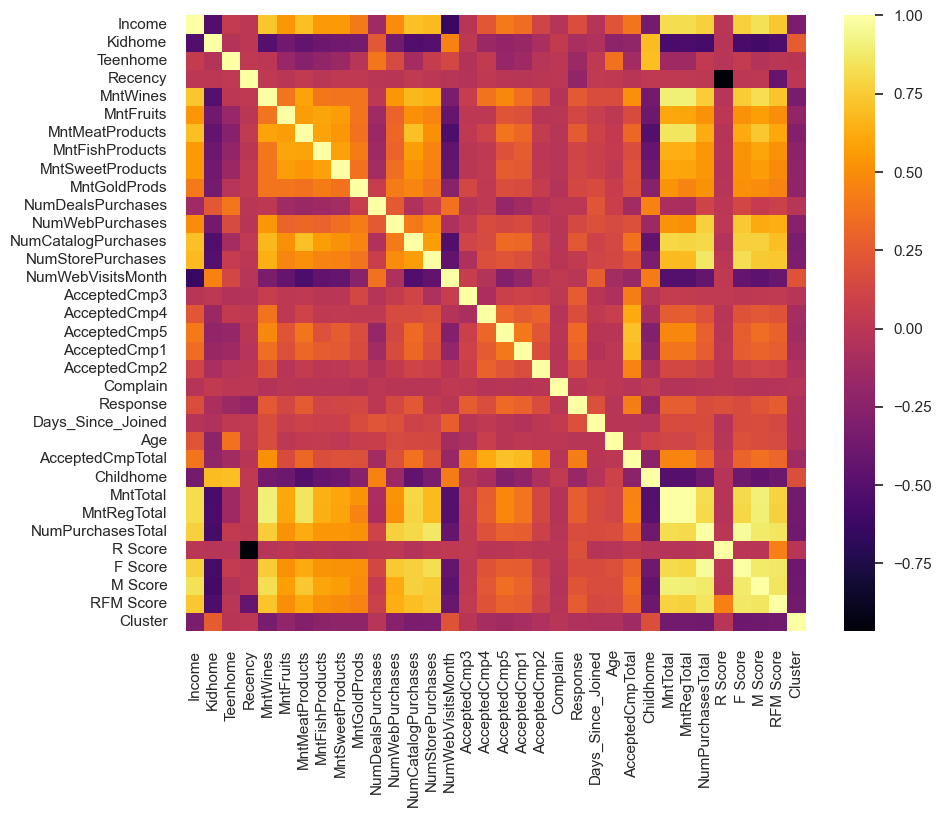

In [54]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='inferno', center=0)
plt.show()

In [55]:
# Calculate the correlation of each column with the "Response" column
correlation_with_response = df_data.corrwith(df_data[target])

# Convert the correlation series to a DataFrame
correlation_df = pd.DataFrame(correlation_with_response, columns=["Correlation"])

# Sort the DataFrame by absolute correlation values in descending order
sorted_correlation_df = correlation_df.abs().sort_values(by="Correlation", ascending=False)

# Display the sorted correlation DataFrame
print(sorted_correlation_df.head(25))

                     Correlation
Response                1.000000
AcceptedCmpTotal        0.425273
AcceptedCmp5            0.326093
AcceptedCmp1            0.291456
MntTotal                0.266969
MntRegTotal             0.266469
RFM Score               0.257718
AcceptedCmp3            0.255022
MntMeatProducts         0.248866
MntWines                0.246590
NumCatalogPurchases     0.234237
M Score                 0.216122
Recency                 0.198761
Days_Since_Joined       0.192850
R Score                 0.187275
AcceptedCmp4            0.177525
Income                  0.173932
Childhome               0.169989
AcceptedCmp2            0.169785
NumPurchasesTotal       0.164098
F Score                 0.159696
Teenhome                0.156231
NumWebPurchases         0.146537
MntGoldProds            0.137043
MntFruits               0.124343


## Choosing Features

It is mainly based on 3 criteria

1. Correlation-based Feature Selection: Features with high absolute correlation values are considered to have a strong linear relationship with the target.
2. Categorical Features: One-hot encoding will be applied.
3. Handpicked Features: Based on domain knowledge.

In [56]:
cat_features = ["Education", "Living_Status", "Cluster"]

num_features = ["AcceptedCmpTotal", "MntRegTotal", "RFM Score", "MntMeatProducts", "MntWines", "MntGoldProds",
                "AcceptedCmp1", "AcceptedCmp3", "AcceptedCmp5", "AcceptedCmp2", "AcceptedCmp4", 
                "Income", "Complain", "Teenhome", "Kidhome", "Days_Since_Joined", # "Childhome", #
                "Recency", "NumWebVisitsMonth", "NumPurchasesTotal"]

# Combining numerical and categorical features to create the feature dataset
df_features = df_data[num_features+cat_features]

df_features.shape

(2225, 22)

## Data split

In [57]:

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(drop="first"), cat_features)],
        remainder='passthrough'  # if 'cluster_labels' will be left as-is
)

# Define features and target
features = num_features + cat_features

# Apply transformations to the data
df_preprocessed = preprocessor.fit_transform(df_features[features])

# Get the transformed feature names after one-hot encoding
transformed_feature_names = list(num_features) + list(preprocessor.transformers_[1][1].get_feature_names_out(cat_features))

# Define the features and the target
# Features
X = pd.DataFrame(df_preprocessed, columns=transformed_feature_names)
# Target
y = df_data[target]

# Split the data into training and test sets 70:30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


## Applying Oversampling Using SMOTE

In [58]:
# Create an instance of SMOTE with certain strategy
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data (not the validation/test data)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


## Model Training and Evaluation

In this section, we will train and evaluate different machine learning models for the classification task. We will explore the following models: Logistic Regression, Random Forest, Gradient Boosting, and Extreme Gradient Boosting. For each model, we will define a parameter grid for hyperparameter tuning and then train and evaluate the model's performance. Additionally, we will visualize the feature importances for each model to gain insights into their predictive capabilities.

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
Accuracy: 0.8203592814371258
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       561
           1       0.47      0.88      0.61       107

    accuracy                           0.82       668
   macro avg       0.72      0.84      0.75       668
weighted avg       0.89      0.82      0.84       668

AUC-ROC: 0.8438869175537674
Top 10 Features:
                  Feature  Importance
9         Education_Basic    2.058025
8           Education_PhD    1.715703
7  Living_Status_Together    1.441050
6                 Recency    1.188404
5         MntMeatProducts    1.155367
4       Days_Since_Joined    1.055829
3               Cluster_1    1.027853
2               Cluster_3    1.026116
1               Cluster_2    0.940322
0        Education_Master    0.725601


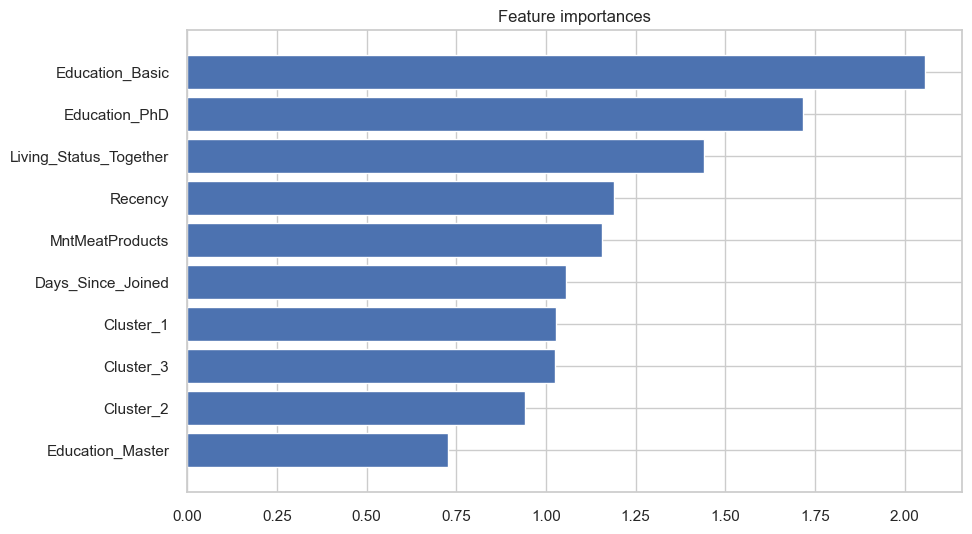

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
Accuracy: 0.8802395209580839
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       561
           1       0.65      0.54      0.59       107

    accuracy                           0.88       668
   macro avg       0.78      0.74      0.76       668
weighted avg       0.87      0.88      0.88       668

AUC-ROC: 0.7433988038715911
Top 10 Features:
                  Feature  Importance
9  Living_Status_Together    0.104267
8       Days_Since_Joined    0.079772
7        AcceptedCmpTotal    0.077187
6                 Recency    0.072326
5       NumWebVisitsMonth    0.070995
4               RFM Score    0.067574
3         MntMeatProducts    0.059088
2             MntRegTotal    0.056079
1            MntGoldProds    0.053512
0                  Income    0.04

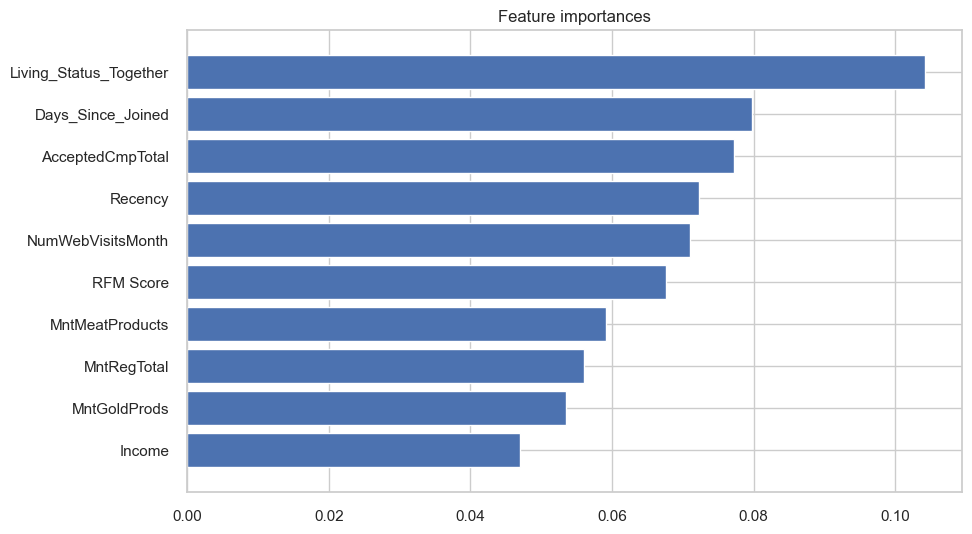

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 4, 'max_depth': 5, 'learning_rate': 0.05}
Accuracy: 0.8907185628742516
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       561
           1       0.65      0.69      0.67       107

    accuracy                           0.89       668
   macro avg       0.79      0.81      0.80       668
weighted avg       0.89      0.89      0.89       668

AUC-ROC: 0.8101437686374464
Top 10 Features:
                  Feature  Importance
9        AcceptedCmpTotal    0.186243
8  Living_Status_Together    0.164858
7                 Recency    0.096797
6       NumWebVisitsMonth    0.087594
5       Days_Since_Joined    0.082870
4               RFM Score    0.065741
3         MntMeatProducts    0.059892
2                Teenhome    0.038911
1           Education_PhD    0.038313
0                  Income    0.02765

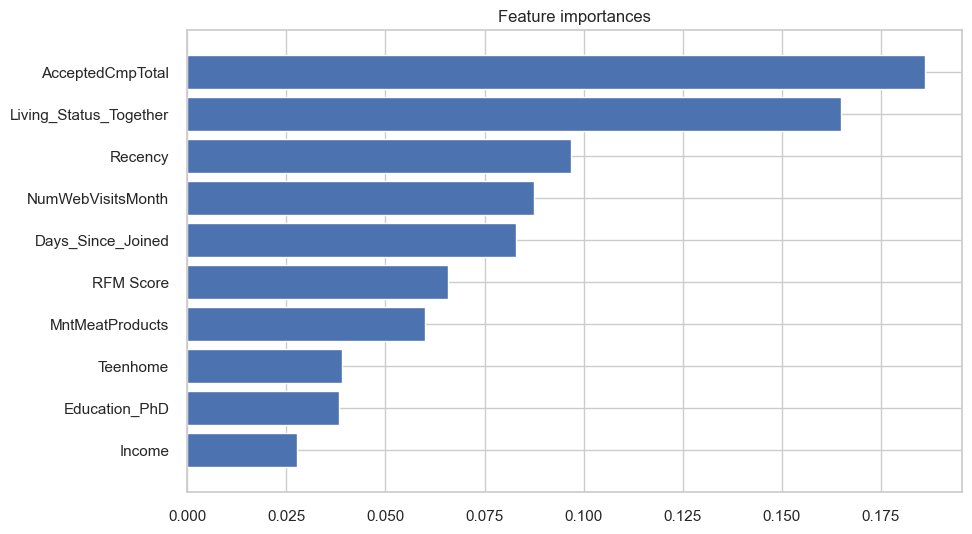

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Accuracy: 0.8937125748502994
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       561
           1       0.66      0.68      0.67       107

    accuracy                           0.89       668
   macro avg       0.80      0.81      0.80       668
weighted avg       0.89      0.89      0.89       668

AUC-ROC: 0.8081446682326288
Top 10 Features:
                  Feature  Importance
9  Living_Status_Together    0.131516
8        AcceptedCmpTotal    0.127159
7               Cluster_2    0.053943
6               RFM Score    0.052517
5               Cluster_1    0.052238
4                Teenhome    0.050418
3    Education_Graduation    0.048706
2           Education_PhD    0.041658
1       NumWebVisitsMonth    0.036313
0                 Kidhom

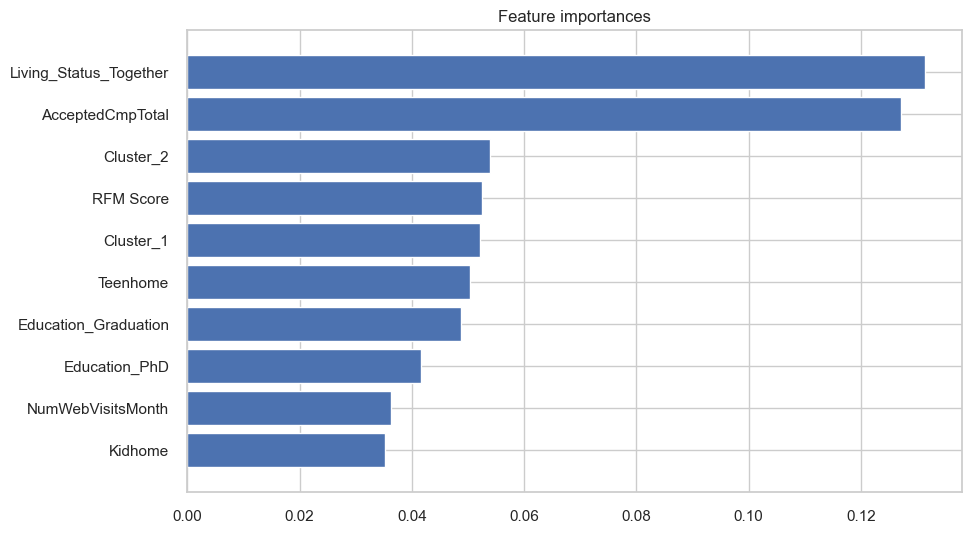

In [63]:
# Get feature names after one-hot encoding
feature_names = X.columns

# Define the parameter grid for each model
LG_params = {
   'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solver algorithm
}

RF_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

GB_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 3, 4]
}

XGB_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}



# Instantiate each model
LG_model = LogisticRegression()
RF_model = RandomForestClassifier(random_state=0)
GB_model = GradientBoostingClassifier(random_state=0)
XGB_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

# Train and evaluate each model
# Logistic Regression
LG_model = train_evaluate_model(LG_model, LG_params, X_resampled, y_resampled, X_test, y_test)
plot_feature_importance(LG_model, feature_names)

# Random Forest
RF_model = train_evaluate_model(RF_model, RF_params, X_resampled, y_resampled, X_test, y_test)
plot_feature_importance(RF_model, feature_names)

# Gradient Boosting
GB_model = train_evaluate_model(GB_model, GB_params, X_resampled, y_resampled, X_test, y_test)
plot_feature_importance(GB_model, feature_names)

# Extreme Gradient Boosting
XGB_model = train_evaluate_model(XGB_model, XGB_params, X_resampled, y_resampled, X_test, y_test)
plot_feature_importance(XGB_model, feature_names)


# Technical Summary of Predictive Model Performance

## Objective:
The primary goal of this project is to create predictive models that allow the company to maximize the profit of the next marketing campaign. Four distinct models were tailored to this objective: Logistic Regression (LG), Random Forest (RF), Gradient Boosting (GB), and Extreme Gradient Boosting (XGB).

### Evaluation Metrics:
The models were evaluated on three key metrics:
- Accuracy: Overall correctness of predictions.
- AUC-ROC Score: Ability to distinguish between the classes.
- Classification Report: Detailed performance per class.

### Model Performance:

**Logistic Regression (LG):**
- Accuracy: 82.04%
- AUC-ROC Score: 84.39%
- Recall: 0.81 (class 0), 0.88 (class 1)
- Insights: High recall for identifying potential customers. Excellent for broad targeting with insights from education and living status.
- Top Features: Education levels, living status, recency, meat product purchases.

**Random Forest (RF):**
- Accuracy: 88.02%
- AUC-ROC Score: 74.34%
- Recall: 0.94 (class 0), 0.54 (class 1)
- Insights: Strong accuracy with balanced performance, emphasizing living status and engagement metrics.
- Top Features: Living status, accepted campaigns, recency, web visits.

**Gradient Boosting (GB):**
- Accuracy: 89.07%
- AUC-ROC Score: 81.01%
- Recall: 0.93 (class 0), 0.69 (class 1)
- Insights: Robust model for profit maximization. Effective balance with insights on customer behavior and demographics.
- Top Features: Accepted campaigns, living status, recency, web visits, income.

**Extreme Gradient Boosting (XGB):**
- Accuracy: 89.37%
- AUC-ROC Score: 80.81%
- Recall: 0.93 (class 0), 0.68 (class 1)
- Insights: Comparable to GB but more adaptable. Potential for niche targeting.
- Top Features: Living status, accepted campaigns, customer clusters, education levels.

### Feature Importance Analysis:
- **Top Influential Features** across models highlight the importance of factors like living status, accepted campaigns, recency, and specific product preferences.
- **Strategic Insights**: These features provide targeted insights for crafting specialized marketing strategies.

### Recommendations:
- **For Broad Targeting**: LG's high recall may be useful for awareness-building phases.
- **For Precision Targeting**: GB and XGB provide balanced performance suitable for more precision-targeted campaigns.
- **Fine-Tuning & Specific Strategies**: XGB offers flexibility for specific targeting with the highest accuracy.
- **Feature Insights**: Utilize key features to create customized marketing strategies for profit maximization.

### Conclusion:
These models offer a robust and diverse set of tools for profit maximization in the upcoming marketing campaign. The specific features and performance metrics provide insights into customer behavior, allowing for tailored marketing strategies.

The combination of model predictions and feature importance analysis presents actionable guidance to enhance marketing efforts and profitability. Stakeholders are encouraged to review the insights and collaborate on model selection, implementation, and strategic focus for the upcoming campaign.


# Executive Summary for Stakeholders: Maximizing Profit for the Upcoming Marketing Campaign

## Introduction:
Our team has leveraged data science to craft intelligent strategies for the next marketing campaign. Using customer data, we have developing predictive models to ensure the success of our next marketing campaign. Below are the insights and key takeaways:

### Understanding Customer Behavior
* **Living Together or Singles:** The models emphasize "Living_Status_Together" as a significant factor. This insight can help us tailor promotions to couples or family-oriented segments.
* **Education Matters:** Features like "Education_PhD" and "Education_Basic" indicate that education level influences preferences. We can segment marketing accordingly.
* **Loyalty and Recency:** Long-standing customers and recent interactions correlate with higher engagement. Exclusive offers or loyalty programs might enhance success.

### Insights from Past Marketing Campaigns
* **Accepted Campaigns:** The response to previous campaigns is a strong predictor. This data can guide more effective future campaigns.

### Digital Engagement
* **Web Visits:** Frequent website visits correlate with higher likelihood of purchase. Improving online engagement can drive sales.

### Model Performance
* **Success Rates:** Our models achieved accuracies ranging from 82% to 89%, with a balanced approach in identifying potential buyers.
* **Living Status and Education:** These factors stood out across models, suggesting areas to focus marketing efforts.

## Recommendations and Next Steps
* **Tailored Campaigns:** Personalize based on living status, education, and loyalty.
* **Enhance Online Channels:** Boost website engagement as a key sales driver.
* **Strategic Targeting:** Opt between broad or precision targeting, aligned with campaign goals.

## Conclusion
The data-driven insights provide a strategic roadmap for a successful marketing campaign. By comprehending customer behavior and leveraging predictive models, we can maximize profit in our next venture.

Thank you for your continued collaboration. We look forward to implementing these insights and achieving outstanding success in our upcoming campaign.
